File: <code>ppg_abp_datasets_peak_50_with_filter.npz</code>

The datasets will be applied 'sav

In [1]:
# Required libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check time
from tqdm import tqdm
from time import sleep

# Datasets
import vitaldb
import preprocess as pre
import pyvital

# PyTorch
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
from torch.optim import Adam
import torch.utils.data
from torch.utils.data import DataLoader
import torchvision.datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [2]:
PPG = 'SNUADC/PLETH'
ABP = 'SNUADC/ART'
SRATE = 100
MAX_CASE = 1000
SEC = 25 

case_sample = 0
valid_mask = []
ppg_sets = []
abp_sets = []

for cid in tqdm(range(1, MAX_CASE+1)):
    vals = vitaldb.load_case(caseid=cid, tnames=[PPG, ABP], interval=1/SRATE)
    for i in range(0, len(vals), SEC*SRATE):
        segx = vals[i:i+ SEC*SRATE]
        ppg, abp = segx[:,0], segx[:,1]
        
        if len(segx) < SEC*SRATE: # 20초 이하의 데이터는 사용 x
            continue
        ###########################################
        # Check the validity of the segemnt
        # Valid condition
        # (1) 0 <= PPG <= 100
        # (2) 20 <= ABP <= 200
        # (3) mstd_val(abp) > 0
        # Else, remove
        ###########################################
        
                
        valid = True
        mstd_val, _ = pre.process_beat(abp)
        
        if np.isnan(ppg).any() or np.isnan(abp).any(): # delete non-value
            valid = False
        if (ppg < 0).any() or (ppg > 100).any():
            valid = False
        if (abp < 20).any() or (abp > 250).any():
            valid = False
        if np.array(mstd_val) <= 0:
            valid = False
#         if (np.abs(np.diff(ppg)) > 15).any():
#             valid = False
#         if (np.abs(np.diff(abp)) > 15).any():
#             valid = False        
            
        if valid:
            # Check ppg peak point
            ppg = pyvital.arr.exclude_undefined(ppg)
            ppg_peaks = pyvital.arr.detect_peaks(ppg, 100) 
            
            # Check abp peak point
            abp = pyvital.arr.exclude_undefined(abp)
            abp_peaks = pyvital.arr.detect_peaks(abp, 100)
                        
            # Mapping the first peak of PPG and the second peak of ABP
            try:
                pid, aid = ppg_peaks[0][0], abp_peaks[0][1]
                new_ppg = ppg[pid:pid+2000]
                new_abp = abp[aid:aid+2000]
                
                if len(new_ppg) != 2000 or len(new_abp) != 2000:
                    continue
                    
                ppg_sets.append(new_ppg)
                abp_sets.append(new_abp)                
                case_sample += 1
            except:
                continue   

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

HR estimation failed, assume 75


  0%|                                                                               | 1/1000 [00:08<2:19:07,  8.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  0%|▏                                                                              | 2/1000 [00:11<1:25:21,  5.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  0%|▏                                                                              | 3/1000 [00:14<1:09:19,  4.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  0%|▎                                                                              | 4/1000 [00:28<2:16:53,  8.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  0%|▍                                                                              | 5/1000 [00:32<1:52:08,  6.76s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  1%|▍                                                                              | 6/1000 [00:33<1:19:58,  4.83s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  1%|▌                                                                              | 7/1000 [00:45<1:53:40,  6.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  1%|▋                                                                              | 8/1000 [00:46<1:23:46,  5.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  1%|▋                                                                              | 9/1000 [00:47<1:02:22,  3.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  1%|▊                                                                             | 10/1000 [01:00<1:51:51,  6.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  1%|▊                                                                             | 11/1000 [01:01<1:23:11,  5.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  1%|▉                                                                             | 12/1000 [01:10<1:43:28,  6.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  1%|█                                                                             | 13/1000 [01:18<1:47:58,  6.56s/it]

HR estimation failed, assume 75


  1%|█                                                                             | 14/1000 [01:20<1:28:22,  5.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▏                                                                            | 15/1000 [01:21<1:05:30,  3.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▏                                                                            | 16/1000 [01:30<1:29:31,  5.46s/it]

HR estimation failed, assume 75


  2%|█▎                                                                            | 17/1000 [01:41<1:56:38,  7.12s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▍                                                                            | 18/1000 [01:42<1:26:10,  5.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▍                                                                            | 19/1000 [02:00<2:29:32,  9.15s/it]

HR estimation failed, assume 75


  2%|█▌                                                                            | 20/1000 [02:19<3:19:56, 12.24s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▋                                                                            | 21/1000 [02:22<2:31:09,  9.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▋                                                                            | 22/1000 [02:31<2:30:45,  9.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▊                                                                            | 23/1000 [02:32<1:48:46,  6.68s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▊                                                                            | 24/1000 [02:37<1:40:47,  6.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  2%|█▉                                                                            | 25/1000 [02:47<1:59:19,  7.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  3%|██                                                                            | 26/1000 [02:55<2:02:03,  7.52s/it]

HR estimation failed, assume 75


  3%|██                                                                            | 27/1000 [03:07<2:26:40,  9.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  3%|██▏                                                                           | 28/1000 [03:26<3:12:36, 11.89s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  3%|██▎                                                                           | 29/1000 [03:40<3:23:56, 12.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  3%|██▎                                                                           | 30/1000 [03:42<2:32:47,  9.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  3%|██▍                                                                           | 31/1000 [03:50<2:22:42,  8.84s/it]

HR estimation failed, assume 75


  3%|██▍                                                                           | 32/1000 [03:54<2:02:33,  7.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  3%|██▌                                                                           | 33/1000 [03:56<1:31:51,  5.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  3%|██▋                                                                           | 34/1000 [04:11<2:16:56,  8.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|██▋                                                                           | 35/1000 [04:12<1:41:12,  6.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|██▊                                                                           | 36/1000 [04:13<1:15:46,  4.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|██▉                                                                           | 37/1000 [04:15<1:03:22,  3.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|██▉                                                                           | 38/1000 [04:23<1:24:48,  5.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|███                                                                           | 39/1000 [04:24<1:04:04,  4.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|███▏                                                                            | 40/1000 [04:26<53:21,  3.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|███▎                                                                            | 41/1000 [04:28<47:59,  3.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|███▎                                                                            | 42/1000 [04:31<46:43,  2.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  4%|███▎                                                                          | 43/1000 [04:41<1:20:41,  5.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  4%|███▍                                                                          | 44/1000 [04:52<1:46:58,  6.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|███▌                                                                          | 45/1000 [04:53<1:21:10,  5.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  5%|███▌                                                                          | 46/1000 [05:01<1:33:06,  5.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  5%|███▋                                                                          | 47/1000 [05:02<1:12:01,  4.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  5%|███▋                                                                          | 48/1000 [05:05<1:01:51,  3.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  5%|███▊                                                                          | 49/1000 [05:15<1:30:45,  5.73s/it]

HR estimation failed, assume 75


  5%|███▉                                                                          | 50/1000 [05:25<1:52:08,  7.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  5%|███▉                                                                          | 51/1000 [05:32<1:50:13,  6.97s/it]

HR estimation failed, assume 75


  5%|████                                                                          | 52/1000 [05:41<2:00:06,  7.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  5%|████▏                                                                         | 53/1000 [05:46<1:48:14,  6.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  5%|████▏                                                                         | 54/1000 [05:49<1:29:13,  5.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  6%|████▎                                                                         | 55/1000 [05:58<1:46:07,  6.74s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  6%|████▍                                                                         | 57/1000 [06:00<1:04:12,  4.09s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  6%|████▌                                                                         | 58/1000 [06:09<1:23:31,  5.32s/it]

HR estimation failed, assume 75


  6%|████▌                                                                         | 59/1000 [06:11<1:10:20,  4.48s/it]

HR estimation failed, assume 75


  6%|████▋                                                                         | 60/1000 [06:21<1:32:48,  5.92s/it]

HR estimation failed, assume 75


  6%|████▊                                                                         | 61/1000 [06:27<1:35:10,  6.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  6%|████▊                                                                         | 62/1000 [06:29<1:16:34,  4.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  6%|█████                                                                           | 63/1000 [06:30<59:52,  3.83s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  6%|████▉                                                                         | 64/1000 [06:40<1:24:46,  5.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  6%|█████                                                                         | 65/1000 [06:49<1:42:20,  6.57s/it]

HR estimation failed, assume 75


  7%|█████▏                                                                        | 66/1000 [06:56<1:43:18,  6.64s/it]

HR estimation failed, assume 75


  7%|█████▏                                                                        | 67/1000 [07:05<1:52:46,  7.25s/it]

HR estimation failed, assume 75


  7%|█████▎                                                                        | 68/1000 [07:11<1:49:42,  7.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  7%|█████▍                                                                        | 69/1000 [07:17<1:42:26,  6.60s/it]

HR estimation failed, assume 75


  7%|█████▍                                                                        | 70/1000 [07:26<1:55:45,  7.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  7%|█████▌                                                                        | 71/1000 [07:27<1:27:15,  5.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  7%|█████▌                                                                        | 72/1000 [07:29<1:08:42,  4.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  7%|█████▊                                                                          | 73/1000 [07:30<53:08,  3.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  7%|█████▊                                                                        | 74/1000 [07:43<1:38:17,  6.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  8%|█████▊                                                                        | 75/1000 [08:02<2:32:19,  9.88s/it]

HR estimation failed, assume 75


  8%|██████                                                                        | 77/1000 [08:09<1:49:12,  7.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  8%|██████                                                                        | 78/1000 [08:10<1:25:41,  5.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  8%|██████▏                                                                       | 79/1000 [08:25<2:02:15,  7.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  8%|██████▏                                                                       | 80/1000 [08:26<1:31:54,  5.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  8%|██████▎                                                                       | 81/1000 [08:28<1:17:36,  5.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  8%|██████▌                                                                         | 82/1000 [08:29<59:13,  3.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  8%|██████▍                                                                       | 83/1000 [08:42<1:37:43,  6.39s/it]

HR estimation failed, assume 75


  8%|██████▌                                                                       | 84/1000 [08:54<2:02:56,  8.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  8%|██████▋                                                                       | 85/1000 [08:55<1:32:19,  6.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  9%|██████▋                                                                       | 86/1000 [08:56<1:10:32,  4.63s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  9%|██████▊                                                                       | 87/1000 [09:05<1:27:58,  5.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  9%|██████▊                                                                       | 88/1000 [09:07<1:09:12,  4.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  9%|██████▉                                                                       | 89/1000 [09:21<1:53:14,  7.46s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  9%|███████                                                                       | 90/1000 [09:22<1:24:44,  5.59s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  9%|███████                                                                       | 91/1000 [09:40<2:22:24,  9.40s/it]

HR estimation failed, assume 75


  9%|███████▏                                                                      | 92/1000 [09:44<1:57:11,  7.74s/it]

HR estimation failed, assume 75


  9%|███████▎                                                                      | 93/1000 [09:47<1:36:16,  6.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  9%|███████▎                                                                      | 94/1000 [10:04<2:23:31,  9.50s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|███████▍                                                                      | 95/1000 [10:05<1:45:00,  6.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|███████▍                                                                      | 96/1000 [10:30<3:03:22, 12.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 10%|███████▌                                                                      | 97/1000 [10:40<2:57:37, 11.80s/it]

HR estimation failed, assume 75


 10%|███████▋                                                                      | 98/1000 [10:46<2:30:13,  9.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|███████▋                                                                      | 99/1000 [10:47<1:50:06,  7.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|███████▋                                                                     | 100/1000 [10:48<1:21:10,  5.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 10%|███████▊                                                                     | 101/1000 [10:58<1:38:12,  6.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|███████▊                                                                     | 102/1000 [10:58<1:13:05,  4.88s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|███████▉                                                                     | 103/1000 [11:06<1:25:56,  5.75s/it]

HR estimation failed, assume 75


 10%|████████                                                                     | 104/1000 [11:16<1:42:21,  6.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 10%|████████                                                                     | 105/1000 [11:28<2:08:25,  8.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 11%|████████▏                                                                    | 106/1000 [11:29<1:34:10,  6.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 11%|████████▏                                                                    | 107/1000 [11:33<1:21:49,  5.50s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 11%|████████▎                                                                    | 108/1000 [11:41<1:31:37,  6.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 11%|████████▍                                                                    | 109/1000 [11:43<1:15:50,  5.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 11%|████████▍                                                                    | 110/1000 [11:49<1:19:02,  5.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 11%|████████▌                                                                    | 111/1000 [12:01<1:47:07,  7.23s/it]

HR estimation failed, assume 75


 11%|████████▌                                                                    | 112/1000 [12:08<1:48:00,  7.30s/it]

HR estimation failed, assume 75


 11%|████████▊                                                                    | 114/1000 [12:17<1:26:39,  5.87s/it]

HR estimation failed, assume 75


 12%|████████▊                                                                    | 115/1000 [12:21<1:19:32,  5.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 12%|████████▉                                                                    | 116/1000 [12:30<1:34:20,  6.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 12%|█████████                                                                    | 117/1000 [12:38<1:40:37,  6.84s/it]

HR estimation failed, assume 75


 12%|█████████                                                                    | 118/1000 [12:57<2:31:39, 10.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 12%|█████████▏                                                                   | 119/1000 [13:09<2:35:59, 10.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 12%|█████████▏                                                                   | 120/1000 [13:10<1:57:21,  8.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 12%|█████████▎                                                                   | 121/1000 [13:12<1:29:30,  6.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 12%|█████████▍                                                                   | 122/1000 [13:15<1:16:19,  5.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 12%|█████████▋                                                                     | 123/1000 [13:16<58:32,  4.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 12%|█████████▊                                                                     | 124/1000 [13:19<55:02,  3.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 12%|█████████▋                                                                   | 125/1000 [13:32<1:34:41,  6.49s/it]

HR estimation failed, assume 75


 13%|█████████▋                                                                   | 126/1000 [13:36<1:25:47,  5.89s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 13%|█████████▊                                                                   | 127/1000 [13:37<1:04:27,  4.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 13%|█████████▊                                                                   | 128/1000 [13:46<1:22:18,  5.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 13%|█████████▉                                                                   | 129/1000 [13:48<1:04:32,  4.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 13%|██████████                                                                   | 130/1000 [14:00<1:40:46,  6.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 13%|██████████                                                                   | 131/1000 [14:01<1:14:34,  5.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 13%|██████████▏                                                                  | 132/1000 [14:09<1:24:11,  5.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 13%|██████████▏                                                                  | 133/1000 [14:11<1:07:43,  4.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 13%|██████████▌                                                                    | 134/1000 [14:12<52:41,  3.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 14%|██████████▍                                                                  | 135/1000 [14:20<1:12:55,  5.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 14%|██████████▍                                                                  | 136/1000 [14:33<1:44:08,  7.23s/it]

HR estimation failed, assume 75


 14%|██████████▌                                                                  | 137/1000 [14:37<1:30:38,  6.30s/it]

HR estimation failed, assume 75


 14%|██████████▋                                                                  | 138/1000 [14:45<1:38:39,  6.87s/it]

HR estimation failed, assume 75


 14%|██████████▋                                                                  | 139/1000 [14:50<1:28:27,  6.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 14%|██████████▊                                                                  | 140/1000 [15:03<2:00:11,  8.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 14%|██████████▊                                                                  | 141/1000 [15:04<1:28:24,  6.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 14%|██████████▉                                                                  | 142/1000 [15:14<1:46:13,  7.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 14%|███████████                                                                  | 143/1000 [15:22<1:45:41,  7.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 14%|███████████▏                                                                 | 145/1000 [15:33<1:32:05,  6.46s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 15%|███████████▏                                                                 | 146/1000 [15:41<1:39:12,  6.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 15%|███████████▎                                                                 | 147/1000 [15:45<1:28:51,  6.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 15%|███████████▍                                                                 | 148/1000 [15:54<1:39:34,  7.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 15%|███████████▍                                                                 | 149/1000 [16:04<1:51:54,  7.89s/it]

HR estimation failed, assume 75


 15%|███████████▌                                                                 | 150/1000 [16:10<1:40:18,  7.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 15%|███████████▋                                                                 | 151/1000 [16:12<1:20:38,  5.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 15%|███████████▋                                                                 | 152/1000 [16:17<1:18:18,  5.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 15%|███████████▊                                                                 | 153/1000 [16:22<1:16:36,  5.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 15%|███████████▊                                                                 | 154/1000 [16:25<1:05:53,  4.67s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 16%|████████████▏                                                                  | 155/1000 [16:26<49:44,  3.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 16%|████████████                                                                 | 156/1000 [16:44<1:49:29,  7.78s/it]

HR estimation failed, assume 75


 16%|████████████                                                                 | 157/1000 [16:50<1:44:05,  7.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 16%|████████████▏                                                                | 158/1000 [16:55<1:31:45,  6.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 16%|████████████▏                                                                | 159/1000 [16:56<1:09:42,  4.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 16%|████████████▎                                                                | 160/1000 [17:06<1:30:57,  6.50s/it]

HR estimation failed, assume 75


 16%|████████████▍                                                                | 161/1000 [17:20<2:00:48,  8.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 16%|████████████▍                                                                | 162/1000 [17:21<1:28:24,  6.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 16%|████████████▌                                                                | 163/1000 [17:25<1:19:27,  5.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 16%|████████████▋                                                                | 164/1000 [17:41<2:02:24,  8.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 16%|████████████▋                                                                | 165/1000 [17:42<1:30:04,  6.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 17%|████████████▊                                                                | 166/1000 [17:56<2:00:17,  8.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 17%|████████████▊                                                                | 167/1000 [18:03<1:55:10,  8.30s/it]

HR estimation failed, assume 75


 17%|████████████▉                                                                | 168/1000 [18:12<1:59:20,  8.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 17%|█████████████                                                                | 169/1000 [18:14<1:29:14,  6.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 17%|█████████████                                                                | 170/1000 [18:15<1:05:11,  4.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 17%|█████████████▌                                                                 | 171/1000 [18:16<51:57,  3.76s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 17%|█████████████▌                                                                 | 172/1000 [18:20<53:07,  3.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 17%|█████████████▋                                                                 | 173/1000 [18:21<42:21,  3.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 17%|█████████████▋                                                                 | 174/1000 [18:22<33:13,  2.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 18%|█████████████▊                                                                 | 175/1000 [18:31<57:47,  4.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|█████████████▉                                                                 | 176/1000 [18:32<46:04,  3.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|█████████████▋                                                               | 177/1000 [18:45<1:25:05,  6.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 18%|█████████████▋                                                               | 178/1000 [18:54<1:36:52,  7.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|█████████████▊                                                               | 179/1000 [18:55<1:12:03,  5.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|█████████████▊                                                               | 180/1000 [19:02<1:17:10,  5.65s/it]

HR estimation failed, assume 75


 18%|█████████████▉                                                               | 181/1000 [19:06<1:13:08,  5.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|██████████████                                                               | 182/1000 [19:09<1:01:42,  4.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|██████████████                                                               | 183/1000 [19:14<1:02:33,  4.59s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 18%|██████████████▏                                                              | 184/1000 [19:37<2:19:52, 10.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 18%|██████████████▏                                                              | 185/1000 [19:46<2:14:45,  9.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 19%|██████████████▎                                                              | 186/1000 [19:54<2:06:49,  9.35s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 19%|██████████████▍                                                              | 187/1000 [19:56<1:35:50,  7.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 19%|██████████████▍                                                              | 188/1000 [19:57<1:11:57,  5.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 19%|██████████████▌                                                              | 189/1000 [20:08<1:33:30,  6.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 19%|██████████████▋                                                              | 190/1000 [20:19<1:49:26,  8.11s/it]

HR estimation failed, assume 75


 19%|██████████████▋                                                              | 191/1000 [20:26<1:44:35,  7.76s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 19%|██████████████▊                                                              | 192/1000 [20:28<1:20:38,  5.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 19%|██████████████▊                                                              | 193/1000 [20:29<1:03:22,  4.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 19%|███████████████▎                                                               | 194/1000 [20:31<51:19,  3.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|███████████████                                                              | 195/1000 [20:44<1:27:06,  6.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|███████████████                                                              | 196/1000 [20:45<1:07:52,  5.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|███████████████▏                                                             | 197/1000 [20:54<1:20:22,  6.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 20%|███████████████▏                                                             | 198/1000 [21:04<1:38:40,  7.38s/it]

HR estimation failed, assume 75


 20%|███████████████▎                                                             | 199/1000 [21:10<1:31:20,  6.84s/it]

HR estimation failed, assume 75


 20%|███████████████▍                                                             | 200/1000 [21:17<1:32:27,  6.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|███████████████▍                                                             | 201/1000 [21:18<1:07:38,  5.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|███████████████▌                                                             | 202/1000 [21:37<2:02:07,  9.18s/it]

HR estimation failed, assume 75


 20%|███████████████▋                                                             | 203/1000 [21:42<1:46:18,  8.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|███████████████▋                                                             | 204/1000 [21:44<1:23:23,  6.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|███████████████▊                                                             | 205/1000 [21:47<1:08:20,  5.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 21%|███████████████▊                                                             | 206/1000 [21:54<1:18:13,  5.91s/it]

HR estimation failed, assume 75


 21%|███████████████▉                                                             | 207/1000 [22:00<1:17:23,  5.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 21%|████████████████                                                             | 208/1000 [22:05<1:12:56,  5.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 21%|████████████████▌                                                              | 209/1000 [22:06<56:17,  4.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 21%|████████████████▏                                                            | 210/1000 [22:17<1:21:46,  6.21s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 21%|████████████████▏                                                            | 211/1000 [22:19<1:04:51,  4.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 21%|████████████████▋                                                              | 212/1000 [22:20<48:39,  3.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 21%|████████████████▊                                                              | 213/1000 [22:21<38:23,  2.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 21%|████████████████▉                                                              | 214/1000 [22:22<32:51,  2.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|████████████████▉                                                              | 215/1000 [22:23<27:36,  2.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|█████████████████                                                              | 216/1000 [22:25<23:47,  1.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 22%|█████████████████▏                                                             | 217/1000 [22:35<59:08,  4.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 22%|████████████████▊                                                            | 218/1000 [22:49<1:34:27,  7.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|████████████████▊                                                            | 219/1000 [22:50<1:10:14,  5.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|█████████████████▍                                                             | 220/1000 [22:52<56:25,  4.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 22%|█████████████████                                                            | 221/1000 [22:58<1:01:19,  4.72s/it]

HR estimation failed, assume 75


 22%|█████████████████                                                            | 222/1000 [23:04<1:07:38,  5.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|█████████████████▌                                                             | 223/1000 [23:05<51:59,  4.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|█████████████████▋                                                             | 224/1000 [23:07<42:01,  3.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|█████████████████▊                                                             | 225/1000 [23:08<33:44,  2.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 23%|█████████████████▊                                                             | 226/1000 [23:09<28:05,  2.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 23%|█████████████████▉                                                             | 227/1000 [23:10<23:59,  1.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 23%|██████████████████                                                             | 228/1000 [23:11<20:18,  1.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 23%|██████████████████                                                             | 229/1000 [23:22<58:08,  4.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 23%|█████████████████▋                                                           | 230/1000 [23:38<1:42:15,  7.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 23%|█████████████████▊                                                           | 231/1000 [23:40<1:17:21,  6.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 23%|█████████████████▊                                                           | 232/1000 [23:47<1:19:42,  6.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 23%|█████████████████▉                                                           | 233/1000 [23:56<1:32:42,  7.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 23%|██████████████████                                                           | 234/1000 [24:07<1:47:16,  8.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████                                                           | 235/1000 [24:09<1:22:59,  6.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████▏                                                          | 236/1000 [24:22<1:47:24,  8.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 24%|██████████████████▏                                                          | 237/1000 [24:38<2:14:17, 10.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████▎                                                          | 238/1000 [24:40<1:43:16,  8.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████▍                                                          | 239/1000 [24:50<1:49:08,  8.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████▍                                                          | 240/1000 [24:51<1:21:19,  6.42s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████▌                                                          | 241/1000 [25:13<2:18:56, 10.98s/it]

HR estimation failed, assume 75


 24%|██████████████████▋                                                          | 242/1000 [25:16<1:48:24,  8.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 24%|██████████████████▋                                                          | 243/1000 [25:23<1:42:11,  8.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████▊                                                          | 244/1000 [25:31<1:40:29,  7.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|██████████████████▊                                                          | 245/1000 [25:32<1:15:03,  5.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 25%|██████████████████▉                                                          | 246/1000 [25:36<1:07:50,  5.40s/it]

HR estimation failed, assume 75


 25%|███████████████████                                                          | 247/1000 [25:50<1:40:14,  7.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 25%|███████████████████                                                          | 248/1000 [25:51<1:14:33,  5.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 25%|███████████████████▋                                                           | 249/1000 [25:52<56:33,  4.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 25%|███████████████████▎                                                         | 250/1000 [26:00<1:10:07,  5.61s/it]

HR estimation failed, assume 75


 25%|███████████████████▎                                                         | 251/1000 [26:11<1:28:35,  7.10s/it]

HR estimation failed, assume 75


 25%|███████████████████▍                                                         | 252/1000 [26:25<1:54:07,  9.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 25%|███████████████████▍                                                         | 253/1000 [26:26<1:23:57,  6.74s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 25%|███████████████████▌                                                         | 254/1000 [26:27<1:03:13,  5.09s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|████████████████████▏                                                          | 255/1000 [26:29<49:03,  3.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|███████████████████▋                                                         | 256/1000 [26:40<1:14:46,  6.03s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|███████████████████▊                                                         | 257/1000 [26:43<1:03:25,  5.12s/it]

HR estimation failed, assume 75


 26%|███████████████████▊                                                         | 258/1000 [26:49<1:09:46,  5.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|████████████████████▍                                                          | 259/1000 [26:50<51:47,  4.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|████████████████████▌                                                          | 260/1000 [26:51<40:38,  3.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|████████████████████▌                                                          | 261/1000 [26:59<55:01,  4.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|████████████████████▋                                                          | 262/1000 [27:00<42:28,  3.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|████████████████████▊                                                          | 263/1000 [27:07<55:21,  4.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 26%|████████████████████▎                                                        | 264/1000 [27:24<1:40:54,  8.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 26%|████████████████████▍                                                        | 265/1000 [27:25<1:15:59,  6.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 27%|████████████████████▍                                                        | 266/1000 [27:37<1:37:15,  7.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 27%|████████████████████▌                                                        | 267/1000 [27:38<1:11:38,  5.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 27%|████████████████████▋                                                        | 268/1000 [27:42<1:05:15,  5.35s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 27%|████████████████████▋                                                        | 269/1000 [27:50<1:14:04,  6.08s/it]

HR estimation failed, assume 75


 27%|████████████████████▊                                                        | 270/1000 [27:54<1:06:18,  5.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 27%|█████████████████████▍                                                         | 271/1000 [27:57<57:20,  4.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 27%|█████████████████████▍                                                         | 272/1000 [28:02<59:05,  4.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 27%|█████████████████████▌                                                         | 273/1000 [28:04<47:45,  3.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 27%|█████████████████████▋                                                         | 274/1000 [28:05<37:25,  3.09s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 28%|█████████████████████▋                                                         | 275/1000 [28:07<32:58,  2.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 28%|█████████████████████▊                                                         | 276/1000 [28:08<27:32,  2.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 28%|█████████████████████▉                                                         | 277/1000 [28:10<25:07,  2.09s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 28%|█████████████████████▉                                                         | 278/1000 [28:11<22:07,  1.84s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 28%|██████████████████████                                                         | 279/1000 [28:17<35:38,  2.97s/it]

HR estimation failed, assume 75


 28%|█████████████████████▌                                                       | 280/1000 [28:32<1:18:32,  6.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 28%|█████████████████████▋                                                       | 281/1000 [28:40<1:24:01,  7.01s/it]

HR estimation failed, assume 75


 28%|█████████████████████▋                                                       | 282/1000 [28:48<1:30:15,  7.54s/it]

HR estimation failed, assume 75


 28%|█████████████████████▊                                                       | 283/1000 [28:58<1:37:07,  8.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 28%|█████████████████████▊                                                       | 284/1000 [29:01<1:19:53,  6.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 28%|█████████████████████▉                                                       | 285/1000 [29:03<1:01:40,  5.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 29%|██████████████████████                                                       | 286/1000 [29:12<1:13:44,  6.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 29%|██████████████████████                                                       | 287/1000 [29:19<1:16:35,  6.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 29%|██████████████████████▊                                                        | 288/1000 [29:20<57:14,  4.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 29%|██████████████████████▊                                                        | 289/1000 [29:21<45:55,  3.88s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 29%|██████████████████████▉                                                        | 290/1000 [29:24<41:53,  3.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 29%|██████████████████████▉                                                        | 291/1000 [29:25<33:15,  2.81s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 29%|███████████████████████                                                        | 292/1000 [29:26<26:32,  2.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 29%|███████████████████████▏                                                       | 293/1000 [29:35<49:02,  4.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 29%|███████████████████████▏                                                       | 294/1000 [29:37<42:20,  3.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|███████████████████████▎                                                       | 295/1000 [29:45<59:17,  5.05s/it]

HR estimation failed, assume 75


 30%|██████████████████████▊                                                      | 296/1000 [29:55<1:14:56,  6.39s/it]

HR estimation failed, assume 75


 30%|██████████████████████▊                                                      | 297/1000 [30:03<1:22:15,  7.02s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|██████████████████████▉                                                      | 298/1000 [30:05<1:02:15,  5.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|███████████████████████▌                                                       | 299/1000 [30:06<46:26,  3.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|███████████████████████▋                                                       | 300/1000 [30:12<55:12,  4.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|███████████████████████▊                                                       | 301/1000 [30:14<45:25,  3.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|███████████████████████▊                                                       | 302/1000 [30:18<47:05,  4.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 30%|███████████████████████▎                                                     | 303/1000 [30:31<1:15:31,  6.50s/it]

HR estimation failed, assume 75


 30%|███████████████████████▍                                                     | 304/1000 [30:40<1:23:52,  7.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|███████████████████████▍                                                     | 305/1000 [30:42<1:07:52,  5.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|███████████████████████▌                                                     | 306/1000 [30:58<1:40:24,  8.68s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|███████████████████████▋                                                     | 307/1000 [30:59<1:15:28,  6.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|███████████████████████▋                                                     | 308/1000 [31:12<1:39:01,  8.59s/it]

HR estimation failed, assume 75


 31%|███████████████████████▊                                                     | 309/1000 [31:21<1:38:25,  8.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|███████████████████████▊                                                     | 310/1000 [31:23<1:16:26,  6.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|████████████████████████▌                                                      | 311/1000 [31:24<57:49,  5.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|████████████████████████                                                     | 312/1000 [31:35<1:15:44,  6.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|████████████████████████                                                     | 313/1000 [31:37<1:00:11,  5.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 31%|████████████████████████▊                                                      | 314/1000 [31:40<52:11,  4.57s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 32%|████████████████████████▉                                                      | 315/1000 [31:41<39:40,  3.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 32%|████████████████████████▉                                                      | 316/1000 [31:45<42:33,  3.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 32%|█████████████████████████                                                      | 317/1000 [31:49<42:29,  3.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 32%|█████████████████████████                                                      | 318/1000 [31:55<50:33,  4.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 32%|█████████████████████████▏                                                     | 319/1000 [32:01<58:02,  5.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 32%|█████████████████████████▎                                                     | 320/1000 [32:03<46:54,  4.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 32%|█████████████████████████▎                                                     | 321/1000 [32:08<49:17,  4.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 32%|█████████████████████████▍                                                     | 322/1000 [32:11<43:27,  3.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 32%|█████████████████████████▌                                                     | 323/1000 [32:18<54:44,  4.85s/it]

HR estimation failed, assume 75


 32%|████████████████████████▉                                                    | 324/1000 [32:28<1:13:00,  6.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 32%|█████████████████████████                                                    | 325/1000 [32:36<1:18:02,  6.94s/it]

HR estimation failed, assume 75


 33%|█████████████████████████                                                    | 326/1000 [32:41<1:11:33,  6.37s/it]

HR estimation failed, assume 75


 33%|█████████████████████████▏                                                   | 327/1000 [32:56<1:40:12,  8.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 33%|█████████████████████████▎                                                   | 328/1000 [32:57<1:13:32,  6.57s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 33%|█████████████████████████▉                                                     | 329/1000 [32:59<57:22,  5.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 33%|█████████████████████████▍                                                   | 330/1000 [33:06<1:02:27,  5.59s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 33%|██████████████████████████▏                                                    | 331/1000 [33:07<47:00,  4.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 33%|██████████████████████████▏                                                    | 332/1000 [33:11<46:36,  4.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 33%|██████████████████████████▎                                                    | 333/1000 [33:13<38:11,  3.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 33%|██████████████████████████▍                                                    | 334/1000 [33:15<36:10,  3.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|██████████████████████████▍                                                    | 335/1000 [33:17<30:49,  2.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|██████████████████████████▌                                                    | 336/1000 [33:19<26:37,  2.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 34%|██████████████████████████▌                                                    | 337/1000 [33:24<36:42,  3.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 34%|██████████████████████████▋                                                    | 338/1000 [33:31<49:50,  4.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|██████████████████████████▊                                                    | 339/1000 [33:33<39:54,  3.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|██████████████████████████▊                                                    | 340/1000 [33:34<32:31,  2.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|██████████████████████████▉                                                    | 341/1000 [33:36<27:21,  2.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|███████████████████████████                                                    | 342/1000 [33:44<46:17,  4.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 34%|███████████████████████████                                                    | 343/1000 [33:52<59:41,  5.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|███████████████████████████▏                                                   | 344/1000 [33:54<45:57,  4.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 34%|██████████████████████████▌                                                  | 345/1000 [34:10<1:25:24,  7.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 35%|██████████████████████████▋                                                  | 346/1000 [34:11<1:04:28,  5.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 35%|███████████████████████████▍                                                   | 347/1000 [34:14<53:49,  4.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 35%|██████████████████████████▊                                                  | 348/1000 [34:23<1:07:10,  6.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 35%|██████████████████████████▊                                                  | 349/1000 [34:33<1:17:52,  7.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 35%|███████████████████████████▋                                                   | 350/1000 [34:34<59:57,  5.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 35%|███████████████████████████                                                  | 351/1000 [34:43<1:09:03,  6.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 35%|███████████████████████████▊                                                   | 352/1000 [34:44<51:27,  4.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 35%|███████████████████████████▏                                                 | 353/1000 [34:55<1:12:11,  6.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 35%|███████████████████████████▎                                                 | 354/1000 [35:07<1:28:18,  8.20s/it]

HR estimation failed, assume 75


 36%|███████████████████████████▎                                                 | 355/1000 [35:13<1:23:51,  7.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|███████████████████████████▍                                                 | 356/1000 [35:15<1:03:45,  5.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|███████████████████████████▍                                                 | 357/1000 [35:20<1:01:21,  5.73s/it]

HR estimation failed, assume 75


 36%|███████████████████████████▌                                                 | 358/1000 [35:32<1:21:17,  7.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 36%|███████████████████████████▋                                                 | 359/1000 [35:50<1:53:48, 10.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|███████████████████████████▋                                                 | 360/1000 [35:52<1:24:27,  7.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|███████████████████████████▊                                                 | 361/1000 [35:53<1:03:28,  5.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|███████████████████████████▊                                                 | 362/1000 [36:06<1:25:27,  8.04s/it]

HR estimation failed, assume 75


 36%|███████████████████████████▉                                                 | 363/1000 [36:18<1:38:13,  9.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 36%|████████████████████████████                                                 | 364/1000 [36:24<1:26:39,  8.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|████████████████████████████                                                 | 365/1000 [36:26<1:07:14,  6.35s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 37%|████████████████████████████▏                                                | 366/1000 [36:33<1:10:00,  6.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 37%|████████████████████████████▎                                                | 367/1000 [36:42<1:17:46,  7.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 37%|████████████████████████████▎                                                | 368/1000 [36:47<1:11:01,  6.74s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 37%|████████████████████████████▍                                                | 369/1000 [36:58<1:22:24,  7.84s/it]

HR estimation failed, assume 75


 37%|████████████████████████████▍                                                | 370/1000 [37:02<1:11:54,  6.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 37%|████████████████████████████▌                                                | 371/1000 [37:09<1:10:18,  6.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 37%|█████████████████████████████▍                                                 | 372/1000 [37:10<52:12,  4.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 37%|█████████████████████████████▍                                                 | 373/1000 [37:11<41:29,  3.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 37%|█████████████████████████████▌                                                 | 374/1000 [37:13<34:51,  3.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|████████████████████████████▉                                                | 375/1000 [37:31<1:20:04,  7.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|█████████████████████████████▋                                                 | 376/1000 [37:32<58:48,  5.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|█████████████████████████████                                                | 377/1000 [37:38<1:00:27,  5.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|█████████████████████████████▊                                                 | 378/1000 [37:41<50:05,  4.83s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|█████████████████████████████▉                                                 | 379/1000 [37:42<38:23,  3.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|██████████████████████████████                                                 | 380/1000 [37:49<49:40,  4.81s/it]

HR estimation failed, assume 75


 38%|██████████████████████████████                                                 | 381/1000 [37:52<43:43,  4.24s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 38%|█████████████████████████████▍                                               | 382/1000 [38:04<1:07:16,  6.53s/it]

HR estimation failed, assume 75


 38%|█████████████████████████████▍                                               | 383/1000 [38:11<1:09:18,  6.74s/it]

HR estimation failed, assume 75


 38%|█████████████████████████████▌                                               | 384/1000 [38:18<1:09:27,  6.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 38%|█████████████████████████████▋                                               | 385/1000 [38:24<1:08:16,  6.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 39%|█████████████████████████████▋                                               | 386/1000 [38:36<1:24:06,  8.22s/it]

HR estimation failed, assume 75


 39%|█████████████████████████████▊                                               | 387/1000 [38:41<1:12:20,  7.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 39%|█████████████████████████████▉                                               | 388/1000 [38:47<1:09:28,  6.81s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 39%|██████████████████████████████▋                                                | 389/1000 [38:48<51:37,  5.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 39%|██████████████████████████████                                               | 390/1000 [39:03<1:23:49,  8.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 39%|██████████████████████████████▉                                                | 392/1000 [39:04<46:58,  4.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 39%|███████████████████████████████                                                | 393/1000 [39:06<38:24,  3.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 39%|███████████████████████████████▏                                               | 394/1000 [39:09<37:17,  3.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▎                                               | 396/1000 [39:10<22:50,  2.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▎                                               | 397/1000 [39:20<41:34,  4.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 40%|███████████████████████████████▍                                               | 398/1000 [39:26<46:38,  4.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▌                                               | 399/1000 [39:27<37:05,  3.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▌                                               | 400/1000 [39:28<30:07,  3.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▋                                               | 401/1000 [39:31<27:53,  2.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▊                                               | 402/1000 [39:42<53:38,  5.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▊                                               | 403/1000 [39:44<42:37,  4.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|███████████████████████████████▉                                               | 404/1000 [39:50<48:40,  4.90s/it]

HR estimation failed, assume 75


 40%|███████████████████████████████▉                                               | 405/1000 [39:56<49:25,  4.98s/it]

HR estimation failed, assume 75


 41%|███████████████████████████████▎                                             | 406/1000 [40:08<1:10:45,  7.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|████████████████████████████████▏                                              | 407/1000 [40:09<52:42,  5.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|███████████████████████████████▍                                             | 408/1000 [40:18<1:03:36,  6.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 41%|███████████████████████████████▍                                             | 409/1000 [40:26<1:07:30,  6.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|████████████████████████████████▍                                              | 410/1000 [40:27<50:42,  5.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|████████████████████████████████▍                                              | 411/1000 [40:28<38:47,  3.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|████████████████████████████████▌                                              | 412/1000 [40:29<31:17,  3.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|████████████████████████████████▋                                              | 413/1000 [40:35<37:38,  3.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|████████████████████████████████▋                                              | 414/1000 [40:37<32:15,  3.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|████████████████████████████████▊                                              | 415/1000 [40:43<39:48,  4.08s/it]

HR estimation failed, assume 75


 42%|████████████████████████████████▊                                              | 416/1000 [40:49<45:34,  4.68s/it]

HR estimation failed, assume 75


 42%|████████████████████████████████                                             | 417/1000 [41:02<1:09:45,  7.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 42%|████████████████████████████████▏                                            | 418/1000 [41:16<1:29:07,  9.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 42%|████████████████████████████████▎                                            | 419/1000 [41:27<1:35:47,  9.89s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|████████████████████████████████▎                                            | 420/1000 [41:28<1:09:50,  7.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|█████████████████████████████████▎                                             | 421/1000 [41:29<51:46,  5.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|█████████████████████████████████▎                                             | 422/1000 [41:31<41:41,  4.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|█████████████████████████████████▍                                             | 423/1000 [41:33<34:55,  3.63s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|█████████████████████████████████▍                                             | 424/1000 [41:37<34:36,  3.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 42%|█████████████████████████████████▌                                             | 425/1000 [41:41<36:29,  3.81s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 43%|█████████████████████████████████▋                                             | 426/1000 [41:43<29:52,  3.12s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 43%|█████████████████████████████████▋                                             | 427/1000 [41:50<42:06,  4.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 43%|█████████████████████████████████▊                                             | 428/1000 [41:51<33:20,  3.50s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 43%|█████████████████████████████████▉                                             | 429/1000 [41:53<27:08,  2.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 43%|█████████████████████████████████▉                                             | 430/1000 [41:56<26:57,  2.84s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 43%|██████████████████████████████████                                             | 431/1000 [42:02<36:59,  3.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 43%|██████████████████████████████████▏                                            | 432/1000 [42:04<31:06,  3.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 43%|██████████████████████████████████▏                                            | 433/1000 [42:05<25:24,  2.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 43%|██████████████████████████████████▎                                            | 434/1000 [42:06<21:17,  2.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 44%|██████████████████████████████████▎                                            | 435/1000 [42:16<43:06,  4.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 44%|██████████████████████████████████▍                                            | 436/1000 [42:18<33:41,  3.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 44%|██████████████████████████████████▌                                            | 437/1000 [42:19<26:14,  2.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 44%|██████████████████████████████████▌                                            | 438/1000 [42:30<51:39,  5.51s/it]

HR estimation failed, assume 75


 44%|██████████████████████████████████▋                                            | 439/1000 [42:38<56:10,  6.01s/it]

HR estimation failed, assume 75


 44%|█████████████████████████████████▉                                           | 440/1000 [42:46<1:03:02,  6.75s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 44%|█████████████████████████████████▉                                           | 441/1000 [42:54<1:07:34,  7.25s/it]

HR estimation failed, assume 75


 44%|██████████████████████████████████                                           | 442/1000 [43:00<1:02:19,  6.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 44%|██████████████████████████████████▉                                            | 443/1000 [43:03<53:12,  5.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 44%|███████████████████████████████████                                            | 444/1000 [43:05<41:49,  4.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 44%|██████████████████████████████████▎                                          | 445/1000 [43:18<1:03:54,  6.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 45%|███████████████████████████████████▏                                           | 446/1000 [43:19<49:20,  5.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 45%|███████████████████████████████████▎                                           | 447/1000 [43:28<58:32,  6.35s/it]

HR estimation failed, assume 75


 45%|██████████████████████████████████▍                                          | 448/1000 [43:38<1:07:50,  7.37s/it]

HR estimation failed, assume 75


 45%|██████████████████████████████████▌                                          | 449/1000 [43:45<1:08:56,  7.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 45%|███████████████████████████████████▌                                           | 450/1000 [43:47<51:31,  5.62s/it]

HR estimation failed, assume 75


 45%|██████████████████████████████████▋                                          | 451/1000 [43:59<1:10:55,  7.75s/it]

HR estimation failed, assume 75


 45%|██████████████████████████████████▊                                          | 452/1000 [44:10<1:17:29,  8.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 45%|██████████████████████████████████▉                                          | 453/1000 [44:13<1:03:38,  6.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 45%|███████████████████████████████████▊                                           | 454/1000 [44:14<47:49,  5.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 46%|███████████████████████████████████▉                                           | 455/1000 [44:20<47:59,  5.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 46%|████████████████████████████████████                                           | 456/1000 [44:21<38:17,  4.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 46%|████████████████████████████████████                                           | 457/1000 [44:24<34:25,  3.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 46%|████████████████████████████████████▏                                          | 458/1000 [44:28<34:31,  3.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 46%|████████████████████████████████████▎                                          | 459/1000 [44:30<29:58,  3.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 46%|████████████████████████████████████▎                                          | 460/1000 [44:39<45:21,  5.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 46%|████████████████████████████████████▍                                          | 461/1000 [44:42<38:05,  4.24s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 46%|████████████████████████████████████▍                                          | 462/1000 [44:51<50:51,  5.67s/it]

HR estimation failed, assume 75


 46%|████████████████████████████████████▌                                          | 463/1000 [44:59<59:04,  6.60s/it]

HR estimation failed, assume 75


 46%|████████████████████████████████████▋                                          | 464/1000 [45:03<51:48,  5.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 46%|████████████████████████████████████▋                                          | 465/1000 [45:05<40:56,  4.59s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 47%|████████████████████████████████████▊                                          | 466/1000 [45:14<50:54,  5.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 47%|████████████████████████████████████▉                                          | 467/1000 [45:15<38:56,  4.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 47%|████████████████████████████████████                                         | 468/1000 [45:28<1:03:10,  7.12s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 47%|████████████████████████████████████                                         | 469/1000 [45:44<1:25:04,  9.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 47%|████████████████████████████████████▏                                        | 470/1000 [45:46<1:05:43,  7.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 47%|█████████████████████████████████████▏                                         | 471/1000 [45:47<48:19,  5.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 47%|████████████████████████████████████▎                                        | 472/1000 [46:05<1:20:30,  9.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 47%|█████████████████████████████████████▎                                         | 473/1000 [46:06<59:20,  6.76s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 47%|████████████████████████████████████▍                                        | 474/1000 [46:19<1:15:04,  8.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 48%|█████████████████████████████████████▌                                         | 475/1000 [46:20<55:08,  6.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 48%|████████████████████████████████████▋                                        | 476/1000 [46:31<1:09:11,  7.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 48%|████████████████████████████████████▋                                        | 477/1000 [46:36<1:00:53,  6.99s/it]

HR estimation failed, assume 75


 48%|█████████████████████████████████████▊                                         | 478/1000 [46:41<55:33,  6.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 48%|█████████████████████████████████████▊                                         | 479/1000 [46:42<41:41,  4.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 48%|█████████████████████████████████████▉                                         | 480/1000 [46:44<32:42,  3.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 48%|█████████████████████████████████████▉                                         | 481/1000 [46:51<42:58,  4.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 48%|██████████████████████████████████████                                         | 482/1000 [46:53<34:04,  3.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 48%|██████████████████████████████████████▏                                        | 483/1000 [47:05<54:56,  6.38s/it]

HR estimation failed, assume 75


 48%|█████████████████████████████████████▎                                       | 484/1000 [47:15<1:03:35,  7.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 48%|█████████████████████████████████████▎                                       | 485/1000 [47:26<1:12:35,  8.46s/it]

HR estimation failed, assume 75


 49%|█████████████████████████████████████▍                                       | 486/1000 [47:39<1:24:05,  9.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 49%|█████████████████████████████████████▍                                       | 487/1000 [47:41<1:03:53,  7.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 49%|█████████████████████████████████████▌                                       | 488/1000 [47:49<1:05:23,  7.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 49%|██████████████████████████████████████▋                                        | 489/1000 [47:53<56:41,  6.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 49%|█████████████████████████████████████▋                                       | 490/1000 [48:07<1:15:33,  8.89s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 49%|██████████████████████████████████████▊                                        | 491/1000 [48:08<55:23,  6.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 49%|█████████████████████████████████████▉                                       | 492/1000 [48:25<1:20:51,  9.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 49%|██████████████████████████████████████▉                                        | 493/1000 [48:26<59:23,  7.03s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 49%|███████████████████████████████████████                                        | 494/1000 [48:27<44:16,  5.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|███████████████████████████████████████                                        | 495/1000 [48:34<49:27,  5.88s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|███████████████████████████████████████▏                                       | 496/1000 [48:36<39:04,  4.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 50%|██████████████████████████████████████▎                                      | 497/1000 [48:56<1:17:39,  9.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|██████████████████████████████████████▎                                      | 498/1000 [48:59<1:00:44,  7.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 50%|██████████████████████████████████████▍                                      | 499/1000 [49:14<1:19:42,  9.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|██████████████████████████████████████▌                                      | 500/1000 [49:16<1:00:52,  7.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 50%|██████████████████████████████████████▌                                      | 501/1000 [49:25<1:05:42,  7.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|███████████████████████████████████████▋                                       | 502/1000 [49:27<49:51,  6.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|███████████████████████████████████████▋                                       | 503/1000 [49:29<40:09,  4.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|███████████████████████████████████████▊                                       | 504/1000 [49:30<31:24,  3.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 50%|███████████████████████████████████████▉                                       | 505/1000 [49:41<47:54,  5.81s/it]

HR estimation failed, assume 75


 51%|███████████████████████████████████████▉                                       | 506/1000 [49:46<46:52,  5.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 51%|████████████████████████████████████████                                       | 507/1000 [49:56<57:54,  7.05s/it]

HR estimation failed, assume 75


 51%|████████████████████████████████████████▏                                      | 508/1000 [50:03<57:53,  7.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 51%|████████████████████████████████████████▏                                      | 509/1000 [50:05<45:27,  5.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 51%|████████████████████████████████████████▎                                      | 510/1000 [50:06<34:15,  4.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 51%|████████████████████████████████████████▎                                      | 511/1000 [50:08<26:45,  3.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 51%|████████████████████████████████████████▍                                      | 512/1000 [50:20<48:04,  5.91s/it]

HR estimation failed, assume 75


 51%|████████████████████████████████████████▌                                      | 513/1000 [50:29<55:45,  6.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 51%|████████████████████████████████████████▌                                      | 514/1000 [50:32<46:42,  5.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|████████████████████████████████████████▋                                      | 515/1000 [50:33<34:36,  4.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|████████████████████████████████████████▊                                      | 516/1000 [50:42<45:56,  5.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|████████████████████████████████████████▊                                      | 517/1000 [50:45<39:07,  4.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|████████████████████████████████████████▉                                      | 518/1000 [50:46<29:36,  3.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|█████████████████████████████████████████                                      | 519/1000 [50:49<27:39,  3.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 52%|█████████████████████████████████████████                                      | 520/1000 [51:00<47:11,  5.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 52%|█████████████████████████████████████████▏                                     | 521/1000 [51:08<51:20,  6.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|█████████████████████████████████████████▏                                     | 522/1000 [51:10<40:05,  5.03s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|█████████████████████████████████████████▎                                     | 523/1000 [51:11<30:31,  3.84s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|█████████████████████████████████████████▍                                     | 524/1000 [51:22<48:28,  6.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 52%|█████████████████████████████████████████▍                                     | 525/1000 [51:26<42:31,  5.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|████████████████████████████████████████▌                                    | 526/1000 [51:44<1:12:13,  9.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 53%|████████████████████████████████████████▌                                    | 527/1000 [51:55<1:17:46,  9.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|█████████████████████████████████████████▋                                     | 528/1000 [51:57<57:41,  7.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|█████████████████████████████████████████▊                                     | 529/1000 [51:58<44:16,  5.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|█████████████████████████████████████████▊                                     | 530/1000 [52:09<55:23,  7.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|█████████████████████████████████████████▉                                     | 531/1000 [52:17<58:26,  7.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|██████████████████████████████████████████                                     | 532/1000 [52:19<46:21,  5.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|█████████████████████████████████████████                                    | 533/1000 [52:32<1:00:38,  7.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 53%|██████████████████████████████████████████▏                                    | 534/1000 [52:34<48:54,  6.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 54%|██████████████████████████████████████████▎                                    | 535/1000 [52:40<47:29,  6.13s/it]

HR estimation failed, assume 75


 54%|██████████████████████████████████████████▎                                    | 536/1000 [52:47<47:56,  6.20s/it]

HR estimation failed, assume 75


 54%|██████████████████████████████████████████▍                                    | 537/1000 [52:50<41:07,  5.33s/it]

HR estimation failed, assume 75


 54%|██████████████████████████████████████████▌                                    | 538/1000 [52:55<41:12,  5.35s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 54%|██████████████████████████████████████████▌                                    | 539/1000 [52:57<31:58,  4.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 54%|██████████████████████████████████████████▋                                    | 540/1000 [52:59<28:31,  3.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 54%|██████████████████████████████████████████▋                                    | 541/1000 [53:05<32:12,  4.21s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 54%|██████████████████████████████████████████▊                                    | 542/1000 [53:06<26:01,  3.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 54%|██████████████████████████████████████████▉                                    | 543/1000 [53:13<33:49,  4.44s/it]

HR estimation failed, assume 75


 54%|██████████████████████████████████████████▉                                    | 544/1000 [53:20<40:30,  5.33s/it]

HR estimation failed, assume 75


 55%|███████████████████████████████████████████                                    | 545/1000 [53:25<38:38,  5.09s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 55%|███████████████████████████████████████████▏                                   | 546/1000 [53:26<29:44,  3.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 55%|███████████████████████████████████████████▏                                   | 547/1000 [53:30<30:10,  4.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 55%|███████████████████████████████████████████▎                                   | 548/1000 [53:33<26:22,  3.50s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 55%|███████████████████████████████████████████▎                                   | 549/1000 [53:34<22:06,  2.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 55%|███████████████████████████████████████████▍                                   | 550/1000 [53:41<31:07,  4.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 55%|███████████████████████████████████████████▌                                   | 551/1000 [53:50<41:17,  5.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 55%|███████████████████████████████████████████▌                                   | 552/1000 [53:51<30:53,  4.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 55%|███████████████████████████████████████████▋                                   | 553/1000 [54:00<42:33,  5.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 55%|███████████████████████████████████████████▊                                   | 554/1000 [54:03<35:45,  4.81s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 56%|███████████████████████████████████████████▊                                   | 555/1000 [54:05<28:17,  3.81s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 56%|███████████████████████████████████████████▉                                   | 556/1000 [54:06<22:23,  3.03s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 56%|████████████████████████████████████████████                                   | 557/1000 [54:15<35:20,  4.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 56%|████████████████████████████████████████████                                   | 558/1000 [54:16<27:12,  3.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 56%|████████████████████████████████████████████▏                                  | 559/1000 [54:30<49:27,  6.73s/it]

HR estimation failed, assume 75


 56%|████████████████████████████████████████████▏                                  | 560/1000 [54:36<49:28,  6.75s/it]

HR estimation failed, assume 75


 56%|████████████████████████████████████████████▎                                  | 561/1000 [54:41<43:53,  6.00s/it]

HR estimation failed, assume 75


 56%|████████████████████████████████████████████▍                                  | 562/1000 [54:47<45:25,  6.22s/it]

HR estimation failed, assume 75


 56%|████████████████████████████████████████████▍                                  | 563/1000 [54:53<43:21,  5.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 56%|███████████████████████████████████████████▍                                 | 564/1000 [55:07<1:01:06,  8.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 56%|████████████████████████████████████████████▋                                  | 565/1000 [55:11<51:50,  7.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 57%|███████████████████████████████████████████▌                                 | 566/1000 [55:23<1:02:19,  8.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 57%|████████████████████████████████████████████▊                                  | 567/1000 [55:30<59:27,  8.24s/it]

HR estimation failed, assume 75


 57%|███████████████████████████████████████████▋                                 | 568/1000 [55:45<1:12:54, 10.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 57%|████████████████████████████████████████████▉                                  | 569/1000 [55:47<55:07,  7.67s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 57%|███████████████████████████████████████████▉                                 | 570/1000 [55:58<1:02:10,  8.67s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 57%|█████████████████████████████████████████████                                  | 571/1000 [56:00<46:56,  6.57s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 57%|█████████████████████████████████████████████▏                                 | 572/1000 [56:01<35:27,  4.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [56:09<42:34,  5.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 57%|█████████████████████████████████████████████▎                                 | 574/1000 [56:11<34:10,  4.81s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 58%|█████████████████████████████████████████████▌                                 | 576/1000 [56:19<30:25,  4.30s/it]

HR estimation failed, assume 75


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [56:28<39:57,  5.67s/it]

HR estimation failed, assume 75


 58%|█████████████████████████████████████████████▋                                 | 578/1000 [56:34<39:03,  5.55s/it]

HR estimation failed, assume 75


 58%|█████████████████████████████████████████████▋                                 | 579/1000 [56:39<38:09,  5.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 58%|█████████████████████████████████████████████▊                                 | 580/1000 [56:40<29:34,  4.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 58%|█████████████████████████████████████████████▉                                 | 581/1000 [56:43<27:35,  3.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 58%|█████████████████████████████████████████████▉                                 | 582/1000 [56:52<37:07,  5.33s/it]

HR estimation failed, assume 75


 58%|██████████████████████████████████████████████                                 | 583/1000 [56:57<36:01,  5.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 58%|██████████████████████████████████████████████▏                                | 584/1000 [57:05<41:56,  6.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 58%|██████████████████████████████████████████████▏                                | 585/1000 [57:13<46:07,  6.67s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 59%|██████████████████████████████████████████████▎                                | 586/1000 [57:14<34:33,  5.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 59%|██████████████████████████████████████████████▎                                | 587/1000 [57:24<44:21,  6.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 59%|██████████████████████████████████████████████▍                                | 588/1000 [57:25<33:05,  4.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 59%|██████████████████████████████████████████████▌                                | 589/1000 [57:32<37:53,  5.53s/it]

HR estimation failed, assume 75


 59%|██████████████████████████████████████████████▌                                | 590/1000 [57:37<36:38,  5.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 59%|██████████████████████████████████████████████▋                                | 591/1000 [57:39<29:02,  4.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 59%|██████████████████████████████████████████████▊                                | 592/1000 [57:40<22:39,  3.33s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 59%|██████████████████████████████████████████████▊                                | 593/1000 [57:51<38:25,  5.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 59%|██████████████████████████████████████████████▉                                | 594/1000 [57:56<37:02,  5.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████                                | 595/1000 [57:57<27:08,  4.02s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 60%|███████████████████████████████████████████████                                | 596/1000 [58:02<29:36,  4.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▏                               | 597/1000 [58:03<22:25,  3.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▏                               | 598/1000 [58:04<18:40,  2.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▎                               | 599/1000 [58:13<31:11,  4.67s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▍                               | 600/1000 [58:15<25:46,  3.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▍                               | 601/1000 [58:18<23:39,  3.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▌                               | 602/1000 [58:20<20:47,  3.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▋                               | 604/1000 [58:22<13:04,  1.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|███████████████████████████████████████████████▊                               | 605/1000 [58:24<14:24,  2.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|███████████████████████████████████████████████▊                               | 606/1000 [58:26<13:39,  2.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|███████████████████████████████████████████████▉                               | 607/1000 [58:28<13:44,  2.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|████████████████████████████████████████████████                               | 608/1000 [58:30<13:29,  2.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|████████████████████████████████████████████████                               | 609/1000 [58:32<12:41,  1.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|████████████████████████████████████████████████▏                              | 610/1000 [58:34<12:49,  1.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|████████████████████████████████████████████████▎                              | 611/1000 [58:48<35:26,  5.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 61%|████████████████████████████████████████████████▎                              | 612/1000 [58:56<40:42,  6.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|████████████████████████████████████████████████▍                              | 613/1000 [58:58<31:55,  4.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 61%|████████████████████████████████████████████████▌                              | 614/1000 [58:59<25:02,  3.89s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 62%|████████████████████████████████████████████████▌                              | 615/1000 [59:01<19:49,  3.09s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 62%|████████████████████████████████████████████████▋                              | 616/1000 [59:08<27:53,  4.36s/it]

HR estimation failed, assume 75


 62%|████████████████████████████████████████████████▋                              | 617/1000 [59:16<34:36,  5.42s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 62%|████████████████████████████████████████████████▊                              | 618/1000 [59:18<28:39,  4.50s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 62%|████████████████████████████████████████████████▉                              | 619/1000 [59:19<21:29,  3.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 62%|████████████████████████████████████████████████▉                              | 620/1000 [59:31<37:07,  5.86s/it]

HR estimation failed, assume 75


 62%|█████████████████████████████████████████████████                              | 621/1000 [59:36<36:02,  5.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [59:48<47:12,  7.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 62%|█████████████████████████████████████████████████▏                             | 623/1000 [59:49<34:52,  5.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [59:57<39:56,  6.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 62%|█████████████████████████████████████████████████▍                             | 625/1000 [59:58<29:22,  4.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 63%|████████████████████████████████████████████████▏                            | 626/1000 [1:00:17<57:02,  9.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 63%|████████████████████████████████████████████████▎                            | 627/1000 [1:00:26<55:47,  8.97s/it]

HR estimation failed, assume 75


 63%|███████████████████████████████████████████████                            | 628/1000 [1:00:46<1:17:26, 12.49s/it]

HR estimation failed, assume 75


 63%|███████████████████████████████████████████████▏                           | 629/1000 [1:01:01<1:21:11, 13.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 63%|███████████████████████████████████████████████▎                           | 630/1000 [1:01:03<1:00:18,  9.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 63%|███████████████████████████████████████████████▎                           | 631/1000 [1:01:16<1:05:53, 10.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 63%|████████████████████████████████████████████████▋                            | 632/1000 [1:01:19<51:07,  8.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 63%|████████████████████████████████████████████████▋                            | 633/1000 [1:01:21<39:59,  6.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 63%|████████████████████████████████████████████████▊                            | 634/1000 [1:01:34<50:52,  8.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 64%|████████████████████████████████████████████████▉                            | 635/1000 [1:01:35<37:27,  6.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 64%|████████████████████████████████████████████████▉                            | 636/1000 [1:01:40<36:09,  5.96s/it]

HR estimation failed, assume 75


 64%|█████████████████████████████████████████████████                            | 637/1000 [1:01:53<49:12,  8.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 64%|█████████████████████████████████████████████████▏                           | 638/1000 [1:02:05<54:48,  9.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 64%|█████████████████████████████████████████████████▏                           | 639/1000 [1:02:06<40:51,  6.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 64%|█████████████████████████████████████████████████▎                           | 640/1000 [1:02:08<31:01,  5.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 64%|█████████████████████████████████████████████████▎                           | 641/1000 [1:02:10<26:23,  4.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 64%|█████████████████████████████████████████████████▍                           | 642/1000 [1:02:12<21:24,  3.59s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 64%|█████████████████████████████████████████████████▌                           | 643/1000 [1:02:13<17:23,  2.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 64%|█████████████████████████████████████████████████▌                           | 644/1000 [1:02:27<36:35,  6.17s/it]

HR estimation failed, assume 75


 64%|█████████████████████████████████████████████████▋                           | 645/1000 [1:02:35<39:54,  6.74s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 65%|█████████████████████████████████████████████████▋                           | 646/1000 [1:02:36<29:21,  4.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 65%|█████████████████████████████████████████████████▊                           | 647/1000 [1:02:37<22:13,  3.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 65%|█████████████████████████████████████████████████▉                           | 648/1000 [1:02:41<22:00,  3.75s/it]

HR estimation failed, assume 75


 65%|█████████████████████████████████████████████████▉                           | 649/1000 [1:02:51<33:16,  5.69s/it]

HR estimation failed, assume 75


 65%|██████████████████████████████████████████████████                           | 650/1000 [1:02:58<35:01,  6.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 65%|██████████████████████████████████████████████████▏                          | 651/1000 [1:02:59<27:49,  4.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 65%|██████████████████████████████████████████████████▏                          | 652/1000 [1:03:12<40:26,  6.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 65%|██████████████████████████████████████████████████▎                          | 653/1000 [1:03:13<31:36,  5.46s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 65%|██████████████████████████████████████████████████▎                          | 654/1000 [1:03:22<37:20,  6.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 66%|██████████████████████████████████████████████████▍                          | 655/1000 [1:03:34<45:27,  7.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 66%|██████████████████████████████████████████████████▌                          | 656/1000 [1:03:35<33:23,  5.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 66%|██████████████████████████████████████████████████▋                          | 658/1000 [1:04:01<54:56,  9.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 66%|██████████████████████████████████████████████████▋                          | 659/1000 [1:04:11<56:03,  9.86s/it]

HR estimation failed, assume 75


 66%|██████████████████████████████████████████████████▊                          | 660/1000 [1:04:19<51:58,  9.17s/it]

HR estimation failed, assume 75


 66%|██████████████████████████████████████████████████▉                          | 661/1000 [1:04:26<48:08,  8.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 66%|██████████████████████████████████████████████████▉                          | 662/1000 [1:04:27<36:01,  6.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 66%|███████████████████████████████████████████████████                          | 663/1000 [1:04:34<36:10,  6.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 66%|███████████████████████████████████████████████████▏                         | 664/1000 [1:04:37<30:53,  5.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 66%|███████████████████████████████████████████████████▏                         | 665/1000 [1:04:57<55:27,  9.93s/it]

HR estimation failed, assume 75


 67%|███████████████████████████████████████████████████▎                         | 666/1000 [1:05:09<59:05, 10.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 67%|██████████████████████████████████████████████████                         | 667/1000 [1:05:25<1:06:57, 12.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 67%|███████████████████████████████████████████████████▍                         | 668/1000 [1:05:26<48:39,  8.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 67%|███████████████████████████████████████████████████▌                         | 670/1000 [1:05:29<29:47,  5.42s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 67%|███████████████████████████████████████████████████▋                         | 671/1000 [1:05:41<38:31,  7.03s/it]

HR estimation failed, assume 75


 67%|███████████████████████████████████████████████████▋                         | 672/1000 [1:05:46<35:29,  6.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 67%|███████████████████████████████████████████████████▊                         | 673/1000 [1:05:53<36:30,  6.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 67%|███████████████████████████████████████████████████▉                         | 674/1000 [1:05:55<28:29,  5.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 68%|███████████████████████████████████████████████████▉                         | 675/1000 [1:05:57<23:35,  4.35s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 68%|████████████████████████████████████████████████████                         | 676/1000 [1:06:09<35:44,  6.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 68%|████████████████████████████████████████████████████▏                        | 677/1000 [1:06:10<26:41,  4.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 68%|████████████████████████████████████████████████████▏                        | 678/1000 [1:06:23<38:47,  7.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 68%|████████████████████████████████████████████████████▎                        | 679/1000 [1:06:33<43:14,  8.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 68%|████████████████████████████████████████████████████▎                        | 680/1000 [1:06:37<37:51,  7.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 68%|████████████████████████████████████████████████████▍                        | 681/1000 [1:06:40<30:13,  5.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 68%|████████████████████████████████████████████████████▌                        | 682/1000 [1:06:41<23:19,  4.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 68%|████████████████████████████████████████████████████▌                        | 683/1000 [1:06:50<31:04,  5.88s/it]

HR estimation failed, assume 75


 68%|████████████████████████████████████████████████████▋                        | 684/1000 [1:06:56<30:56,  5.88s/it]

HR estimation failed, assume 75


 68%|████████████████████████████████████████████████████▋                        | 685/1000 [1:07:06<36:58,  7.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 69%|████████████████████████████████████████████████████▊                        | 686/1000 [1:07:07<27:22,  5.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 69%|████████████████████████████████████████████████████▉                        | 687/1000 [1:07:15<31:29,  6.04s/it]

HR estimation failed, assume 75


 69%|████████████████████████████████████████████████████▉                        | 688/1000 [1:07:19<28:17,  5.44s/it]

HR estimation failed, assume 75


 69%|█████████████████████████████████████████████████████                        | 689/1000 [1:07:22<24:43,  4.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 69%|█████████████████████████████████████████████████████▏                       | 690/1000 [1:07:25<21:34,  4.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 69%|█████████████████████████████████████████████████████▏                       | 691/1000 [1:07:37<34:07,  6.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 69%|█████████████████████████████████████████████████████▎                       | 692/1000 [1:07:40<28:00,  5.46s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 69%|█████████████████████████████████████████████████████▎                       | 693/1000 [1:07:44<25:39,  5.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 69%|█████████████████████████████████████████████████████▍                       | 694/1000 [1:07:47<21:43,  4.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|█████████████████████████████████████████████████████▌                       | 695/1000 [1:07:48<16:44,  3.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|█████████████████████████████████████████████████████▌                       | 696/1000 [1:07:49<14:24,  2.84s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 70%|█████████████████████████████████████████████████████▋                       | 697/1000 [1:08:01<26:50,  5.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 70%|█████████████████████████████████████████████████████▋                       | 698/1000 [1:08:11<34:13,  6.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|█████████████████████████████████████████████████████▊                       | 699/1000 [1:08:24<44:24,  8.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|█████████████████████████████████████████████████████▉                       | 700/1000 [1:08:26<32:37,  6.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|█████████████████████████████████████████████████████▉                       | 701/1000 [1:08:28<26:45,  5.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 70%|██████████████████████████████████████████████████████                       | 702/1000 [1:08:40<36:11,  7.29s/it]

HR estimation failed, assume 75


 70%|██████████████████████████████████████████████████████▏                      | 703/1000 [1:08:49<38:29,  7.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|██████████████████████████████████████████████████████▏                      | 704/1000 [1:08:51<29:43,  6.03s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|██████████████████████████████████████████████████████▎                      | 705/1000 [1:08:52<22:16,  4.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|██████████████████████████████████████████████████████▎                      | 706/1000 [1:08:59<26:25,  5.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 71%|██████████████████████████████████████████████████████▍                      | 707/1000 [1:09:13<38:16,  7.84s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|██████████████████████████████████████████████████████▌                      | 708/1000 [1:09:16<31:25,  6.46s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|██████████████████████████████████████████████████████▌                      | 709/1000 [1:09:17<23:55,  4.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|██████████████████████████████████████████████████████▋                      | 710/1000 [1:09:19<18:23,  3.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 71%|██████████████████████████████████████████████████████▋                      | 711/1000 [1:09:34<35:43,  7.42s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|██████████████████████████████████████████████████████▊                      | 712/1000 [1:09:35<26:23,  5.50s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|██████████████████████████████████████████████████████▉                      | 713/1000 [1:09:37<20:34,  4.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|██████████████████████████████████████████████████████▉                      | 714/1000 [1:09:38<15:56,  3.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████                      | 715/1000 [1:09:39<12:14,  2.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████▏                     | 716/1000 [1:09:47<19:48,  4.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████▏                     | 717/1000 [1:09:48<16:01,  3.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████▎                     | 718/1000 [1:09:49<12:44,  2.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████▎                     | 719/1000 [1:10:03<27:46,  5.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████▍                     | 720/1000 [1:10:07<25:12,  5.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 72%|███████████████████████████████████████████████████████▌                     | 721/1000 [1:10:16<30:23,  6.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 72%|███████████████████████████████████████████████████████▌                     | 722/1000 [1:10:28<37:51,  8.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████▋                     | 723/1000 [1:10:29<27:34,  5.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 72%|███████████████████████████████████████████████████████▋                     | 724/1000 [1:10:33<24:46,  5.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 72%|███████████████████████████████████████████████████████▊                     | 725/1000 [1:10:47<35:53,  7.83s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 73%|███████████████████████████████████████████████████████▉                     | 726/1000 [1:10:54<34:50,  7.63s/it]

HR estimation failed, assume 75


 73%|███████████████████████████████████████████████████████▉                     | 727/1000 [1:10:58<30:09,  6.63s/it]

HR estimation failed, assume 75


 73%|████████████████████████████████████████████████████████                     | 728/1000 [1:11:12<40:28,  8.93s/it]

HR estimation failed, assume 75


 73%|████████████████████████████████████████████████████████▏                    | 729/1000 [1:11:24<43:27,  9.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 73%|████████████████████████████████████████████████████████▏                    | 730/1000 [1:11:32<41:33,  9.24s/it]

HR estimation failed, assume 75


 73%|████████████████████████████████████████████████████████▎                    | 731/1000 [1:11:39<37:44,  8.42s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 73%|████████████████████████████████████████████████████████▎                    | 732/1000 [1:11:40<28:06,  6.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 73%|████████████████████████████████████████████████████████▍                    | 733/1000 [1:11:51<34:09,  7.68s/it]

HR estimation failed, assume 75


 73%|████████████████████████████████████████████████████████▌                    | 734/1000 [1:12:06<44:16,  9.99s/it]

HR estimation failed, assume 75


 74%|████████████████████████████████████████████████████████▌                    | 735/1000 [1:12:14<41:38,  9.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 74%|████████████████████████████████████████████████████████▋                    | 736/1000 [1:12:16<31:05,  7.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 74%|████████████████████████████████████████████████████████▋                    | 737/1000 [1:12:24<31:52,  7.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 74%|████████████████████████████████████████████████████████▊                    | 738/1000 [1:12:26<25:01,  5.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 74%|████████████████████████████████████████████████████████▉                    | 739/1000 [1:12:34<27:51,  6.40s/it]

HR estimation failed, assume 75


 74%|████████████████████████████████████████████████████████▉                    | 740/1000 [1:12:40<28:01,  6.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 74%|█████████████████████████████████████████████████████████                    | 741/1000 [1:12:59<44:15, 10.25s/it]

HR estimation failed, assume 75


 74%|█████████████████████████████████████████████████████████▏                   | 742/1000 [1:13:13<48:19, 11.24s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 74%|█████████████████████████████████████████████████████████▏                   | 743/1000 [1:13:17<38:46,  9.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 74%|█████████████████████████████████████████████████████████▎                   | 744/1000 [1:13:24<35:35,  8.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 74%|█████████████████████████████████████████████████████████▎                   | 745/1000 [1:13:33<37:30,  8.83s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 75%|█████████████████████████████████████████████████████████▍                   | 746/1000 [1:13:40<34:41,  8.20s/it]

HR estimation failed, assume 75


 75%|█████████████████████████████████████████████████████████▌                   | 747/1000 [1:13:44<28:52,  6.85s/it]

HR estimation failed, assume 75


 75%|█████████████████████████████████████████████████████████▌                   | 748/1000 [1:13:57<36:42,  8.74s/it]

HR estimation failed, assume 75


 75%|█████████████████████████████████████████████████████████▋                   | 749/1000 [1:14:03<33:25,  7.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 75%|████████████████████████████████████████████████████████▎                  | 750/1000 [1:14:36<1:04:10, 15.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 75%|████████████████████████████████████████████████████████▎                  | 751/1000 [1:14:50<1:02:05, 14.96s/it]

HR estimation failed, assume 75


 75%|█████████████████████████████████████████████████████████▉                   | 752/1000 [1:15:02<58:07, 14.06s/it]

HR estimation failed, assume 75


 75%|█████████████████████████████████████████████████████████▉                   | 753/1000 [1:15:05<43:57, 10.68s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 75%|██████████████████████████████████████████████████████████                   | 754/1000 [1:15:07<32:53,  8.02s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 76%|██████████████████████████████████████████████████████████▏                  | 755/1000 [1:15:14<31:48,  7.79s/it]

HR estimation failed, assume 75


 76%|██████████████████████████████████████████████████████████▏                  | 756/1000 [1:15:22<31:59,  7.87s/it]

HR estimation failed, assume 75


 76%|██████████████████████████████████████████████████████████▎                  | 757/1000 [1:15:28<29:50,  7.37s/it]

HR estimation failed, assume 75


 76%|██████████████████████████████████████████████████████████▎                  | 758/1000 [1:15:34<27:32,  6.83s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 76%|██████████████████████████████████████████████████████████▍                  | 759/1000 [1:15:35<20:20,  5.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 76%|██████████████████████████████████████████████████████████▌                  | 760/1000 [1:15:36<15:35,  3.90s/it]

HR estimation failed, assume 75


 76%|██████████████████████████████████████████████████████████▌                  | 761/1000 [1:15:40<15:30,  3.89s/it]

HR estimation failed, assume 75


 76%|██████████████████████████████████████████████████████████▋                  | 762/1000 [1:15:48<20:52,  5.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 76%|██████████████████████████████████████████████████████████▊                  | 763/1000 [1:16:04<33:48,  8.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 76%|██████████████████████████████████████████████████████████▊                  | 764/1000 [1:16:17<38:18,  9.74s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 76%|██████████████████████████████████████████████████████████▉                  | 765/1000 [1:16:33<45:55, 11.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 77%|██████████████████████████████████████████████████████████▉                  | 766/1000 [1:16:35<33:45,  8.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 77%|███████████████████████████████████████████████████████████                  | 767/1000 [1:16:46<37:03,  9.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 77%|███████████████████████████████████████████████████████████▏                 | 769/1000 [1:17:01<32:26,  8.43s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 77%|███████████████████████████████████████████████████████████▎                 | 770/1000 [1:17:05<26:55,  7.02s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 77%|███████████████████████████████████████████████████████████▎                 | 771/1000 [1:17:10<25:06,  6.58s/it]

HR estimation failed, assume 75


 77%|███████████████████████████████████████████████████████████▍                 | 772/1000 [1:17:19<27:53,  7.34s/it]

HR estimation failed, assume 75


 77%|███████████████████████████████████████████████████████████▌                 | 773/1000 [1:17:26<26:59,  7.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 77%|███████████████████████████████████████████████████████████▌                 | 774/1000 [1:17:40<35:14,  9.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 78%|███████████████████████████████████████████████████████████▋                 | 775/1000 [1:17:52<37:41, 10.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 78%|███████████████████████████████████████████████████████████▊                 | 776/1000 [1:18:02<37:54, 10.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 78%|███████████████████████████████████████████████████████████▊                 | 777/1000 [1:18:25<51:34, 13.88s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|███████████████████████████████████████████████████████████▉                 | 778/1000 [1:18:26<37:03, 10.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|███████████████████████████████████████████████████████████▉                 | 779/1000 [1:18:41<42:29, 11.54s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|████████████████████████████████████████████████████████████                 | 780/1000 [1:18:44<32:17,  8.81s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 78%|████████████████████████████████████████████████████████████▏                | 781/1000 [1:18:49<28:07,  7.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|████████████████████████████████████████████████████████████▏                | 782/1000 [1:18:52<23:08,  6.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|████████████████████████████████████████████████████████████▎                | 783/1000 [1:19:00<24:33,  6.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|████████████████████████████████████████████████████████████▎                | 784/1000 [1:19:02<19:44,  5.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|████████████████████████████████████████████████████████████▍                | 785/1000 [1:19:05<16:48,  4.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 79%|████████████████████████████████████████████████████████████▌                | 786/1000 [1:19:06<12:58,  3.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 79%|████████████████████████████████████████████████████████████▌                | 787/1000 [1:19:08<10:40,  3.01s/it]

HR estimation failed, assume 75


 79%|████████████████████████████████████████████████████████████▋                | 788/1000 [1:19:14<13:53,  3.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 79%|████████████████████████████████████████████████████████████▊                | 789/1000 [1:19:17<12:58,  3.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 79%|████████████████████████████████████████████████████████████▊                | 790/1000 [1:19:21<12:53,  3.68s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 79%|████████████████████████████████████████████████████████████▉                | 791/1000 [1:19:30<19:11,  5.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 79%|████████████████████████████████████████████████████████████▉                | 792/1000 [1:19:39<22:00,  6.35s/it]

HR estimation failed, assume 75


 79%|█████████████████████████████████████████████████████████████                | 793/1000 [1:19:48<24:55,  7.22s/it]

HR estimation failed, assume 75


 79%|█████████████████████████████████████████████████████████████▏               | 794/1000 [1:19:56<25:25,  7.41s/it]

HR estimation failed, assume 75


 80%|█████████████████████████████████████████████████████████████▏               | 795/1000 [1:20:05<27:35,  8.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 80%|█████████████████████████████████████████████████████████████▎               | 796/1000 [1:20:19<32:40,  9.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 80%|█████████████████████████████████████████████████████████████▎               | 797/1000 [1:20:24<27:45,  8.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▍               | 798/1000 [1:20:25<20:39,  6.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▌               | 799/1000 [1:20:27<16:04,  4.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▌               | 800/1000 [1:20:35<19:54,  5.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▋               | 801/1000 [1:20:37<15:50,  4.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▊               | 802/1000 [1:20:48<21:48,  6.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▊               | 803/1000 [1:20:49<16:06,  4.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▉               | 804/1000 [1:20:51<12:44,  3.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████▉               | 805/1000 [1:20:52<10:08,  3.12s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 81%|██████████████████████████████████████████████████████████████               | 806/1000 [1:20:53<08:26,  2.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 81%|██████████████████████████████████████████████████████████████▏              | 807/1000 [1:21:05<17:12,  5.35s/it]

HR estimation failed, assume 75


 81%|██████████████████████████████████████████████████████████████▏              | 808/1000 [1:21:16<22:14,  6.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 81%|██████████████████████████████████████████████████████████████▎              | 809/1000 [1:21:18<17:57,  5.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 81%|██████████████████████████████████████████████████████████████▎              | 810/1000 [1:21:22<16:03,  5.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 81%|██████████████████████████████████████████████████████████████▍              | 811/1000 [1:21:25<13:59,  4.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 81%|██████████████████████████████████████████████████████████████▌              | 812/1000 [1:21:34<18:13,  5.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 81%|██████████████████████████████████████████████████████████████▌              | 813/1000 [1:21:44<21:32,  6.91s/it]

HR estimation failed, assume 75


 81%|██████████████████████████████████████████████████████████████▋              | 814/1000 [1:21:58<28:28,  9.19s/it]

HR estimation failed, assume 75


 82%|██████████████████████████████████████████████████████████████▊              | 815/1000 [1:22:11<32:02, 10.39s/it]

HR estimation failed, assume 75


 82%|██████████████████████████████████████████████████████████████▊              | 816/1000 [1:22:18<28:17,  9.23s/it]

HR estimation failed, assume 75


 82%|██████████████████████████████████████████████████████████████▉              | 817/1000 [1:22:29<30:05,  9.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 82%|██████████████████████████████████████████████████████████████▉              | 818/1000 [1:22:44<34:37, 11.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 82%|███████████████████████████████████████████████████████████████              | 819/1000 [1:22:54<32:34, 10.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 82%|███████████████████████████████████████████████████████████████▏             | 820/1000 [1:22:55<24:07,  8.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 82%|███████████████████████████████████████████████████████████████▎             | 822/1000 [1:23:09<22:25,  7.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 82%|███████████████████████████████████████████████████████████████▎             | 823/1000 [1:23:10<17:45,  6.02s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 82%|███████████████████████████████████████████████████████████████▍             | 824/1000 [1:23:13<15:20,  5.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 82%|███████████████████████████████████████████████████████████████▌             | 825/1000 [1:23:20<16:40,  5.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 83%|███████████████████████████████████████████████████████████████▌             | 826/1000 [1:23:23<13:45,  4.75s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 83%|███████████████████████████████████████████████████████████████▋             | 827/1000 [1:23:29<15:01,  5.21s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 83%|███████████████████████████████████████████████████████████████▊             | 828/1000 [1:23:30<11:40,  4.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 83%|███████████████████████████████████████████████████████████████▊             | 829/1000 [1:23:32<09:09,  3.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 83%|███████████████████████████████████████████████████████████████▉             | 830/1000 [1:23:40<13:22,  4.72s/it]

HR estimation failed, assume 75


 83%|███████████████████████████████████████████████████████████████▉             | 831/1000 [1:23:48<16:06,  5.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 83%|████████████████████████████████████████████████████████████████             | 832/1000 [1:23:50<12:37,  4.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 83%|████████████████████████████████████████████████████████████████▏            | 833/1000 [1:23:59<16:49,  6.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 83%|████████████████████████████████████████████████████████████████▏            | 834/1000 [1:24:00<12:37,  4.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▎            | 835/1000 [1:24:08<14:58,  5.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▎            | 836/1000 [1:24:09<11:44,  4.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▍            | 837/1000 [1:24:12<10:05,  3.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▌            | 838/1000 [1:24:13<07:51,  2.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▌            | 839/1000 [1:24:14<06:40,  2.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▋            | 840/1000 [1:24:16<05:44,  2.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▊            | 841/1000 [1:24:26<12:12,  4.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▊            | 842/1000 [1:24:27<09:17,  3.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▉            | 843/1000 [1:24:42<18:09,  6.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████▉            | 844/1000 [1:24:47<16:17,  6.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 84%|█████████████████████████████████████████████████████████████████            | 845/1000 [1:24:52<15:35,  6.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 85%|█████████████████████████████████████████████████████████████████▏           | 846/1000 [1:25:02<18:07,  7.06s/it]

HR estimation failed, assume 75


 85%|█████████████████████████████████████████████████████████████████▏           | 847/1000 [1:25:16<23:19,  9.15s/it]

HR estimation failed, assume 75


 85%|█████████████████████████████████████████████████████████████████▎           | 848/1000 [1:25:24<22:24,  8.84s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 85%|█████████████████████████████████████████████████████████████████▎           | 849/1000 [1:25:25<16:35,  6.59s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 85%|█████████████████████████████████████████████████████████████████▍           | 850/1000 [1:25:26<12:22,  4.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 85%|█████████████████████████████████████████████████████████████████▌           | 851/1000 [1:25:39<18:22,  7.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 85%|█████████████████████████████████████████████████████████████████▌           | 852/1000 [1:25:46<17:36,  7.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 85%|█████████████████████████████████████████████████████████████████▋           | 853/1000 [1:25:51<16:12,  6.62s/it]

HR estimation failed, assume 75


 85%|█████████████████████████████████████████████████████████████████▊           | 854/1000 [1:25:54<12:59,  5.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 86%|█████████████████████████████████████████████████████████████████▊           | 855/1000 [1:26:02<15:10,  6.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|█████████████████████████████████████████████████████████████████▉           | 856/1000 [1:26:03<11:06,  4.63s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|█████████████████████████████████████████████████████████████████▉           | 857/1000 [1:26:06<09:41,  4.07s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|██████████████████████████████████████████████████████████████████           | 858/1000 [1:26:07<07:36,  3.21s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 86%|██████████████████████████████████████████████████████████████████▏          | 859/1000 [1:26:20<14:13,  6.05s/it]

HR estimation failed, assume 75


 86%|██████████████████████████████████████████████████████████████████▏          | 860/1000 [1:26:26<14:28,  6.20s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|██████████████████████████████████████████████████████████████████▎          | 861/1000 [1:26:27<10:42,  4.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|██████████████████████████████████████████████████████████████████▎          | 862/1000 [1:26:30<09:30,  4.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|██████████████████████████████████████████████████████████████████▍          | 863/1000 [1:26:32<08:06,  3.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|██████████████████████████████████████████████████████████████████▌          | 864/1000 [1:26:36<08:27,  3.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 86%|██████████████████████████████████████████████████████████████████▌          | 865/1000 [1:26:47<13:09,  5.85s/it]

HR estimation failed, assume 75


 87%|██████████████████████████████████████████████████████████████████▋          | 866/1000 [1:26:55<14:44,  6.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 87%|██████████████████████████████████████████████████████████████████▊          | 867/1000 [1:26:56<10:54,  4.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 87%|██████████████████████████████████████████████████████████████████▊          | 868/1000 [1:27:01<10:14,  4.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 87%|██████████████████████████████████████████████████████████████████▉          | 869/1000 [1:27:18<18:48,  8.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 87%|██████████████████████████████████████████████████████████████████▉          | 870/1000 [1:27:32<21:46, 10.05s/it]

HR estimation failed, assume 75


 87%|███████████████████████████████████████████████████████████████████          | 871/1000 [1:27:43<22:34, 10.50s/it]

HR estimation failed, assume 75


 87%|███████████████████████████████████████████████████████████████████▏         | 872/1000 [1:27:57<24:15, 11.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 87%|███████████████████████████████████████████████████████████████████▏         | 873/1000 [1:28:00<19:02,  9.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 87%|███████████████████████████████████████████████████████████████████▎         | 874/1000 [1:28:01<13:56,  6.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|███████████████████████████████████████████████████████████████████▍         | 875/1000 [1:28:03<10:25,  5.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 88%|███████████████████████████████████████████████████████████████████▍         | 876/1000 [1:28:12<13:09,  6.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|███████████████████████████████████████████████████████████████████▌         | 877/1000 [1:28:13<09:41,  4.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|███████████████████████████████████████████████████████████████████▌         | 878/1000 [1:28:15<07:42,  3.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|███████████████████████████████████████████████████████████████████▋         | 879/1000 [1:28:20<08:31,  4.23s/it]

HR estimation failed, assume 75


 88%|███████████████████████████████████████████████████████████████████▊         | 880/1000 [1:28:26<09:26,  4.72s/it]

HR estimation failed, assume 75


 88%|███████████████████████████████████████████████████████████████████▊         | 881/1000 [1:28:32<10:01,  5.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|███████████████████████████████████████████████████████████████████▉         | 882/1000 [1:28:34<08:13,  4.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|███████████████████████████████████████████████████████████████████▉         | 883/1000 [1:28:48<13:51,  7.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|████████████████████████████████████████████████████████████████████         | 884/1000 [1:28:49<10:14,  5.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|████████████████████████████████████████████████████████████████████▏        | 885/1000 [1:29:02<14:43,  7.68s/it]

HR estimation failed, assume 75


 89%|████████████████████████████████████████████████████████████████████▏        | 886/1000 [1:29:20<20:32, 10.81s/it]

HR estimation failed, assume 75


 89%|████████████████████████████████████████████████████████████████████▎        | 887/1000 [1:29:26<17:52,  9.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 89%|████████████████████████████████████████████████████████████████████▍        | 888/1000 [1:29:27<12:53,  6.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 89%|████████████████████████████████████████████████████████████████████▍        | 889/1000 [1:29:29<09:58,  5.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 89%|████████████████████████████████████████████████████████████████████▌        | 890/1000 [1:29:35<10:18,  5.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 89%|████████████████████████████████████████████████████████████████████▌        | 891/1000 [1:29:36<07:38,  4.21s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 89%|████████████████████████████████████████████████████████████████████▋        | 892/1000 [1:29:42<08:31,  4.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 89%|████████████████████████████████████████████████████████████████████▊        | 893/1000 [1:29:44<06:42,  3.76s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 89%|████████████████████████████████████████████████████████████████████▊        | 894/1000 [1:29:49<07:14,  4.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|████████████████████████████████████████████████████████████████████▉        | 895/1000 [1:29:50<05:30,  3.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|████████████████████████████████████████████████████████████████████▉        | 896/1000 [1:29:50<04:14,  2.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 90%|█████████████████████████████████████████████████████████████████████        | 897/1000 [1:29:56<06:05,  3.55s/it]

HR estimation failed, assume 75


 90%|█████████████████████████████████████████████████████████████████████▏       | 898/1000 [1:30:04<08:17,  4.88s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████▏       | 899/1000 [1:30:08<07:21,  4.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████▎       | 900/1000 [1:30:09<05:37,  3.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████▍       | 901/1000 [1:30:10<04:26,  2.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████▍       | 902/1000 [1:30:12<04:18,  2.64s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████▌       | 903/1000 [1:30:14<03:38,  2.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████▌       | 904/1000 [1:30:16<03:36,  2.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████▋       | 905/1000 [1:30:17<03:04,  1.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 91%|█████████████████████████████████████████████████████████████████████▊       | 906/1000 [1:30:18<02:37,  1.67s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 91%|█████████████████████████████████████████████████████████████████████▊       | 907/1000 [1:30:27<06:03,  3.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 91%|█████████████████████████████████████████████████████████████████████▉       | 909/1000 [1:30:28<03:35,  2.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 91%|██████████████████████████████████████████████████████████████████████       | 910/1000 [1:30:33<04:19,  2.89s/it]

HR estimation failed, assume 75


 91%|██████████████████████████████████████████████████████████████████████▏      | 911/1000 [1:30:41<06:28,  4.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 91%|██████████████████████████████████████████████████████████████████████▏      | 912/1000 [1:30:49<07:51,  5.36s/it]

HR estimation failed, assume 75


 91%|██████████████████████████████████████████████████████████████████████▎      | 913/1000 [1:30:55<07:57,  5.49s/it]

HR estimation failed, assume 75


 91%|██████████████████████████████████████████████████████████████████████▍      | 914/1000 [1:30:58<06:52,  4.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|██████████████████████████████████████████████████████████████████████▍      | 915/1000 [1:30:59<05:13,  3.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 92%|██████████████████████████████████████████████████████████████████████▌      | 916/1000 [1:31:06<06:34,  4.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 92%|██████████████████████████████████████████████████████████████████████▌      | 917/1000 [1:31:19<09:45,  7.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|██████████████████████████████████████████████████████████████████████▋      | 918/1000 [1:31:20<07:11,  5.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 92%|██████████████████████████████████████████████████████████████████████▊      | 919/1000 [1:31:27<07:41,  5.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|██████████████████████████████████████████████████████████████████████▊      | 920/1000 [1:31:30<06:33,  4.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|██████████████████████████████████████████████████████████████████████▉      | 921/1000 [1:31:31<04:57,  3.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 92%|██████████████████████████████████████████████████████████████████████▉      | 922/1000 [1:31:38<06:08,  4.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|███████████████████████████████████████████████████████████████████████      | 923/1000 [1:31:40<04:56,  3.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|███████████████████████████████████████████████████████████████████████▏     | 924/1000 [1:31:43<04:35,  3.63s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|███████████████████████████████████████████████████████████████████████▏     | 925/1000 [1:31:46<04:25,  3.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 93%|███████████████████████████████████████████████████████████████████████▎     | 926/1000 [1:31:51<04:56,  4.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 93%|███████████████████████████████████████████████████████████████████████▍     | 927/1000 [1:31:53<04:10,  3.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 93%|███████████████████████████████████████████████████████████████████████▍     | 928/1000 [1:31:55<03:35,  2.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 93%|███████████████████████████████████████████████████████████████████████▌     | 929/1000 [1:31:57<03:08,  2.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 93%|███████████████████████████████████████████████████████████████████████▌     | 930/1000 [1:31:59<02:51,  2.45s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 93%|███████████████████████████████████████████████████████████████████████▋     | 931/1000 [1:32:05<03:51,  3.35s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 93%|███████████████████████████████████████████████████████████████████████▊     | 932/1000 [1:32:10<04:33,  4.02s/it]

HR estimation failed, assume 75


 93%|███████████████████████████████████████████████████████████████████████▊     | 933/1000 [1:32:18<05:53,  5.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 93%|███████████████████████████████████████████████████████████████████████▉     | 934/1000 [1:32:20<04:32,  4.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 94%|███████████████████████████████████████████████████████████████████████▉     | 935/1000 [1:32:22<03:43,  3.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 94%|████████████████████████████████████████████████████████████████████████     | 936/1000 [1:32:33<06:06,  5.73s/it]

HR estimation failed, assume 75


 94%|████████████████████████████████████████████████████████████████████████▏    | 937/1000 [1:32:45<08:08,  7.76s/it]

HR estimation failed, assume 75


 94%|████████████████████████████████████████████████████████████████████████▏    | 938/1000 [1:32:50<07:11,  6.97s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 94%|████████████████████████████████████████████████████████████████████████▎    | 939/1000 [1:32:56<06:35,  6.49s/it]

HR estimation failed, assume 75


 94%|████████████████████████████████████████████████████████████████████████▍    | 940/1000 [1:33:00<05:48,  5.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 94%|████████████████████████████████████████████████████████████████████████▍    | 941/1000 [1:33:01<04:26,  4.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 94%|████████████████████████████████████████████████████████████████████████▌    | 942/1000 [1:33:03<03:29,  3.61s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 94%|████████████████████████████████████████████████████████████████████████▌    | 943/1000 [1:33:04<02:34,  2.70s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 94%|████████████████████████████████████████████████████████████████████████▋    | 944/1000 [1:33:18<05:41,  6.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 94%|████████████████████████████████████████████████████████████████████████▊    | 945/1000 [1:33:24<05:47,  6.32s/it]

HR estimation failed, assume 75


 95%|████████████████████████████████████████████████████████████████████████▊    | 946/1000 [1:33:30<05:33,  6.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75


 95%|████████████████████████████████████████████████████████████████████████▉    | 947/1000 [1:33:41<06:47,  7.69s/it]

HR estimation failed, assume 75


 95%|████████████████████████████████████████████████████████████████████████▉    | 948/1000 [1:33:53<07:35,  8.75s/it]

HR estimation failed, assume 75


 95%|█████████████████████████████████████████████████████████████████████████    | 949/1000 [1:34:03<07:46,  9.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 95%|█████████████████████████████████████████████████████████████████████████▏   | 950/1000 [1:34:04<05:32,  6.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 95%|█████████████████████████████████████████████████████████████████████████▏   | 951/1000 [1:34:05<04:04,  4.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 95%|█████████████████████████████████████████████████████████████████████████▎   | 952/1000 [1:34:11<04:21,  5.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 95%|█████████████████████████████████████████████████████████████████████████▍   | 953/1000 [1:34:14<03:39,  4.68s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 95%|█████████████████████████████████████████████████████████████████████████▍   | 954/1000 [1:34:18<03:28,  4.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|█████████████████████████████████████████████████████████████████████████▌   | 955/1000 [1:34:20<02:38,  3.53s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|█████████████████████████████████████████████████████████████████████████▌   | 956/1000 [1:34:21<02:06,  2.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|█████████████████████████████████████████████████████████████████████████▋   | 957/1000 [1:34:32<03:49,  5.34s/it]

HR estimation failed, assume 75


 96%|█████████████████████████████████████████████████████████████████████████▊   | 958/1000 [1:34:41<04:28,  6.40s/it]

HR estimation failed, assume 75


 96%|█████████████████████████████████████████████████████████████████████████▊   | 959/1000 [1:34:51<05:14,  7.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|█████████████████████████████████████████████████████████████████████████▉   | 960/1000 [1:34:53<03:54,  5.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|█████████████████████████████████████████████████████████████████████████▉   | 961/1000 [1:34:54<02:54,  4.48s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|██████████████████████████████████████████████████████████████████████████   | 962/1000 [1:34:56<02:16,  3.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 96%|██████████████████████████████████████████████████████████████████████████▏  | 963/1000 [1:35:11<04:20,  7.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|██████████████████████████████████████████████████████████████████████████▏  | 964/1000 [1:35:14<03:28,  5.79s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|██████████████████████████████████████████████████████████████████████████▎  | 965/1000 [1:35:18<03:05,  5.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 97%|██████████████████████████████████████████████████████████████████████████▍  | 966/1000 [1:35:20<02:26,  4.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 97%|██████████████████████████████████████████████████████████████████████████▍  | 967/1000 [1:35:27<02:46,  5.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 97%|██████████████████████████████████████████████████████████████████████████▌  | 968/1000 [1:35:28<02:03,  3.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 97%|██████████████████████████████████████████████████████████████████████████▌  | 969/1000 [1:35:37<02:46,  5.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 97%|██████████████████████████████████████████████████████████████████████████▊  | 971/1000 [1:35:48<02:38,  5.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 97%|██████████████████████████████████████████████████████████████████████████▊  | 972/1000 [1:36:00<03:20,  7.17s/it]

HR estimation failed, assume 75


 97%|██████████████████████████████████████████████████████████████████████████▉  | 973/1000 [1:36:05<02:53,  6.41s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 97%|██████████████████████████████████████████████████████████████████████████▉  | 974/1000 [1:36:06<02:10,  5.02s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 98%|███████████████████████████████████████████████████████████████████████████  | 975/1000 [1:36:09<01:54,  4.57s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 98%|███████████████████████████████████████████████████████████████████████████▏ | 976/1000 [1:36:20<02:32,  6.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 98%|███████████████████████████████████████████████████████████████████████████▏ | 977/1000 [1:36:24<02:07,  5.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 98%|███████████████████████████████████████████████████████████████████████████▎ | 978/1000 [1:36:26<01:40,  4.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 98%|███████████████████████████████████████████████████████████████████████████▍ | 979/1000 [1:36:33<01:51,  5.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 98%|███████████████████████████████████████████████████████████████████████████▍ | 980/1000 [1:36:56<03:30, 10.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 98%|███████████████████████████████████████████████████████████████████████████▌ | 981/1000 [1:36:57<02:26,  7.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 98%|███████████████████████████████████████████████████████████████████████████▌ | 982/1000 [1:36:59<01:46,  5.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 98%|███████████████████████████████████████████████████████████████████████████▋ | 983/1000 [1:37:07<01:52,  6.59s/it]

HR estimation failed, assume 75


 98%|███████████████████████████████████████████████████████████████████████████▊ | 984/1000 [1:37:12<01:39,  6.22s/it]

HR estimation failed, assume 75


 98%|███████████████████████████████████████████████████████████████████████████▊ | 985/1000 [1:37:22<01:49,  7.32s/it]

HR estimation failed, assume 75


 99%|███████████████████████████████████████████████████████████████████████████▉ | 986/1000 [1:37:32<01:53,  8.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 99%|███████████████████████████████████████████████████████████████████████████▉ | 987/1000 [1:37:33<01:17,  5.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 99%|████████████████████████████████████████████████████████████████████████████ | 988/1000 [1:37:43<01:26,  7.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 99%|████████████████████████████████████████████████████████████████████████████▏| 989/1000 [1:37:44<00:58,  5.36s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 99%|████████████████████████████████████████████████████████████████████████████▏| 990/1000 [1:37:52<01:01,  6.19s/it]

HR estimation failed, assume 75


 99%|████████████████████████████████████████████████████████████████████████████▎| 991/1000 [1:38:00<00:58,  6.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 99%|████████████████████████████████████████████████████████████████████████████▍| 992/1000 [1:38:16<01:16,  9.61s/it]

HR estimation failed, assume 75


 99%|████████████████████████████████████████████████████████████████████████████▍| 993/1000 [1:38:23<01:00,  8.66s/it]

HR estimation failed, assume 75


 99%|████████████████████████████████████████████████████████████████████████████▌| 994/1000 [1:38:28<00:45,  7.63s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


100%|████████████████████████████████████████████████████████████████████████████▌| 995/1000 [1:38:37<00:39,  7.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

100%|████████████████████████████████████████████████████████████████████████████▋| 996/1000 [1:38:38<00:23,  5.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


100%|████████████████████████████████████████████████████████████████████████████▊| 997/1000 [1:38:42<00:15,  5.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

100%|████████████████████████████████████████████████████████████████████████████▉| 999/1000 [1:38:44<00:03,  3.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:38:45<00:00,  5.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


In [3]:
print(case_sample)
print(len(ppg_sets), np.amax(ppg_sets), np.amin(ppg_sets))
print(len(abp_sets), np.amax(abp_sets), np.amin(abp_sets))

202941
202941 97.5917 0.0309719
202941 249.904 20.814


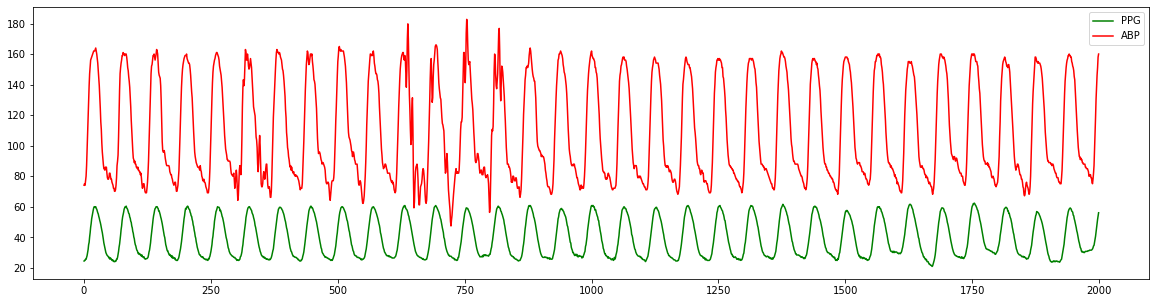

In [4]:
#### Before Preprocessing ------------------------------------
# Draw a sample waveform for PPG
plt.figure(figsize=(20,5))
plt.plot(ppg_sets[2], color='g', label='PPG')
plt.plot(abp_sets[2], color='r', label='ABP')
plt.legend()

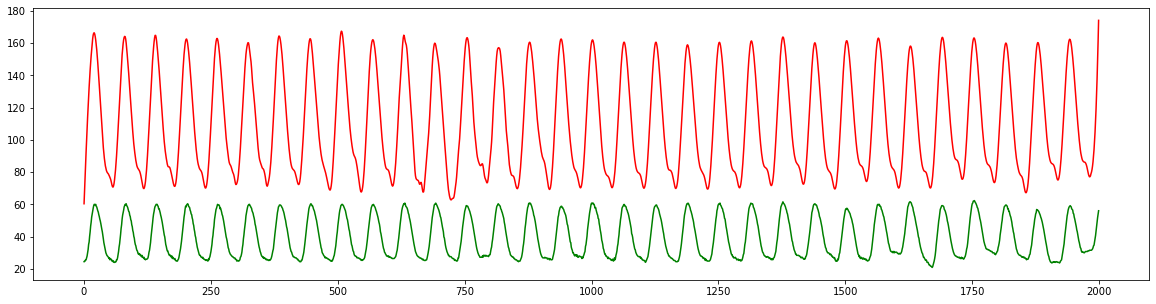

In [5]:
#### After Preprocessing ------------------------------------
from scipy.signal import savgol_filter
ppg_sets = savgol_filter(ppg_sets, 31, 3)
abp_sets = savgol_filter(abp_sets, 31, 3)
plt.figure(figsize=(20,5))
plt.plot(ppg_sets[2], color='g', label='PPG')
plt.plot(abp_sets[2], color='r', label='ABP')

In [6]:
cachefile ='./datasets/ppg_abp_datasets_peak_1000_with_filter_both.npz'
np.savez(cachefile, ppg_sets=ppg_sets, abp_sets=abp_sets) # Save cahce file